In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

# COGS 108 - Driving Clean: The Impact of Renewables, Income, and EVs on Air Quality and CO2 Emissions

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Names

- Clayton Tan
- Daniel Budidharma
- Sergei Sotkinov
- Varick Janiro Hasim
- Viveka Dhanda
  
# Abstract

CO2 emissions and air quality present a huge problem in modern society, as it relates directly to global warming and people's health. This project aims to find if a country's renewable energy consumption, income level, and electric vehicle adoption affect its air quality and CO2 emissions. The answer to this question is explored through descriptive statistics by making various plots to see the relationship between each of our dependent variables and our independent variables, as well as building a linear regression model and looking at its R<sup>2</sup>.

This project has found that a country’s use of renewable energy and income level has a small effect on its air quality and CO2 emissions. This project has also found that electric car sales share in each country has no correlation with its CO2 emissions and a slight negative relationship with its AQI.

<img src ='images/EV_charging.jpg' width=70%><br>
<i>Photo by Martin do Nascimento, CalMatters, https://calmatters.org/environment/climate-change/2025/02/electric-car-sales-stall-california/</i>

<img src=images/jakarta_polluted.jpg width=80%><br>
<i>Smog in Jakarta, Indonesia, one of the most air polluted cities in the world. Photo by Wendra Ajistyatama, The Jakarta Post, https://www.thejakartapost.com/academia/2019/06/29/jakartas-enemy-is-air-pollution.html</i>

# Research Question 🤔

Does a country’s renewable energy consumption, income level, and electric vehicle adoption affect its air quality and CO2 emissions?
Qualitatively, what is the correlation between these variables if we built a linear regression model?

## Background and Prior Work 📄

Our team’s project aims to explore the effects of renewable energy and electrical vehicle usage by country on its air quality and emissions, whilst also keeping in mind the inequities in gaining clean energy access as well as development levels. Air pollution is becoming a huge problem in modern, industrialized societies. According to the WHO, 99% of the global population are exposed to unsafe air pollution levels owing to 4.2 million deaths globally. Additionally, air pollutants can also cause complications such as stroke, ischemic heart disease, chronic obstructive pulmonary disease, pneumonia, and lung cancer.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)  

Major air pollutants include fine particulate matter (PM2.5), nitrogen oxides, sulfur dioxide (SO₂), and carbon dioxide (CO₂). They primarily originate from fossil fuel combustion in power plants, industrial facilities, and transportation sectors, with additional contributions from agriculture, residential heating, and waste incineration.

As university students majoring in Data Science, we believe that this question is answerable through statistical analysis of the relationship between renewable energy, electric vehicles, and public transit on air quality using data-driven approaches. By identifying correlations between renewable energy consumption and emission reductions, disparities in clean energy adoption between high- and low-income countries, and the effectiveness of electric vehicles in lowering transportation-related pollution, we can gain valuable insights into the role of sustainable technologies in improving air quality.  

With the global rise in the renewable energy industry, understanding these relationships is crucial for shaping sustainable policies and technological advancements. This topic also aligns with the growing demand for data-driven solutions in climate and energy sectors, offering valuable skills and knowledge for our future careers. Ultimately, our analysis can contribute to evidence-based decision-making for governments, businesses, and researchers working toward a more sustainable future.  

The relationship between renewable energy adoption, electric vehicles (EVs), and public transportation usage with air pollution reduction has been widely studied. Research shows that shifting from fossil fuels to renewable energy sources such as wind and solar significantly reduces greenhouse gas emissions and air pollutants like sulfur dioxide and nitrogen oxides.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)  Similarly, the widespread adoption of EVs lowers emissions from the transportation sector, a major contributor to urban air pollution, particularly fine particulate matter (PM2.5) and nitrogen oxides.

Additionally, increased investment in and use of public transportation helps reduce overall vehicle emissions by decreasing the number of private cars on the road. Countries that have implemented policies promoting these sustainable practices have observed measurable improvements in air quality, highlighting their effectiveness in mitigating pollution and improving public health.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) World Health Organization. (n.d.). Exposure & health impacts of air pollution. https://www.who.int/teams/environment-climate-change-and-health/air-quality-energy-and-health/health-impacts/exposure-air-pollution  
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Millstein, D., Wiser, R., Bolinger, M. et al. The climate and air-quality benefits of wind and solar power in the United States. Nat Energy 2, 17134 (2017). https://doi.org/10.1038/nenergy.2017.134

### Prior Work:  

- Pennington, A. F., Cornwell, C. R., Sircar, K. D., & Mirabelli, M. C. (2024). Electric vehicles and health: A scoping review. Environmental research, 251(Pt 2), 118697. https://doi.org/10.1016/j.envres.2024.118697.
<br>This paper reviewed extensive literature on the environmental and public health benefits of electric vehicles (EVs), synthesizing qualitative and quantitative findings. The review highlights that EVs can reduce air pollution and improve human health, though the benefits depend on factors like EV type and energy source. A key finding is that while road traffic pollution primarily affects urban populations, power plant emissions impact rural areas. The study identifies knowledge gaps, particularly in comprehensive EV life cycle emissions analysis and geographic disparities in research. Most studies focus on the U.S. and China, while other regions with high renewable energy potential remain underexplored. Further research is needed to address these gaps and inform sustainable EV policies worldwide.
<br>

- Lyu, W., Hu, Y., Liu, J. et al. Impact of battery electric vehicle usage on air quality in three Chinese first-tier cities. Sci Rep 14, 21 (2024). https://doi.org/10.1038/s41598-023-50745-6.
<br>A study published in Nature examined the impact of battery electric vehicles (BEVs) on air quality in Beijing, Shanghai, and Shenzhen. The analysis revealed that BEVs, when replacing fuel vehicles for equivalent mileages, generally contribute to better emission reductions.<br>  

# Hypothesis 💭

We expect there to be a moderately positive correlation between EV adoption towards air quality, since most people live in urban areas where the main source of air pollution is from vehicles. We expect a slightly weaker but still positive correlation between renewable energy adoption and air quality, as well as income level and air quality since richer countries tend to have better means to adopt EVs and clean air policies.

# Data 📊

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Global Air Pollution Data
  - Link to the dataset: https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data/data
  - Number of observations: 23,463 (number of cities observed)
  - Number of variables: 11 (such as aqi value, aqi category, co aqi value, etc. More detailed description below)
- Dataset #2
  - Dataset Name: Global Electric Vehicle Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024
  - Number of observations: 12,654 rows
  - Number of variables: 8 (region, category, parameter, mode, powertrain, year, unit, value)
- Dataset #3
  - Dataset Name: Renewable energy consumption (% of total final energy consumption) by country
  - Link to the dataset: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS
  - Number of observations: 266 (266 countries and aggregate regions)
  - Number of variables: 64 (percentage of renewable energy consumption for each year from 1960-2023)
- Dataset #4
  - Dataset Name: Annual CO₂ Emissions Per Country
  - Link to the dataset: https://ourworldindata.org/grapher/annual-co2-emissions-per-country?tab=table
  - Number of observations: 29137 (including countries and aggregate regions per year)
  - Number of variables: 4 (Entity – Country or region name, Code – Country code (5,640 missing values, mainly for regions), Year – Year of recorded emissions (1880-2023),Annual CO₂ emissions (Total emissions in metric tons))


We have data about air quality of cities in each country, global electric vehicle sales in each country (which is a proxy for electric vehicle adoption), renewable energy consumption in each country, and CO2 emissions of each country. These datasets correspond to the variables in our research question. More detailed explanation of each dataset and wrangling as well as cleaning process below.

Some of the datasets are from kaggle, but we have verified that they come from reputable sources.

Moreover, since all of these datasets track countries, it should be fairly simple to merge on country name during analysis later. However, due to the large amount of columns and uncertainty before the exploratory data analysis, we will refrain from merging all of them at once for now. For example, one possible issue is that countries that are represented in one dataset aren't represented in other datasets, or countries are named differently across datasets. These will have to be looked at manually after we have learned more about the data through EDA. After we learn more through EDA and we move on to answering our research question, we plan to tidy it further for merging.

## Air Pollution

From the description: "This dataset, spanning 170 countries and 300+ cities, provides a holistic view of global air quality dynamics. Focused on crucial pollutants like Carbon Monoxide, Ozone, Nitrogen Dioxide, and Particulate Matter (PM2.5), it serves as a valuable resource for environmental scientists, policymakers, and researchers. The insights derived from this dataset empower users to analyze air quality trends, formulate effective policies, and contribute to fostering a healthier planet."

The data is sourced from eLichens, a company that makes air quality sensors. Their data is "derived by a patented eLichens algorithms obtained using various inputs including weather data, real-time traffic data, and local air quality agencies data"

The columns include country name, city name, overall Air Quality Index (AQI) values, and concentrations of specific pollutants.
- city_name     -Name of the city
- country_name  -Name of the country the city is in
- aqi_value	    -Overall AQI value of the city
- aqi_category	-Overall AQI category of the city
- co_aqi_value	-AQI value of Carbon Monoxide of the city
- co_aqi_category       -AQI category of Carbon Monoxide of the city
- ozone_aqi_value	    -AQI value of Ozone of the city
- ozone_aqi_category    -AQI category of Ozone of the city
- no2_aqi_value     -AQI value of Nitrogen Dioxide of the city
- no2_aqi_category  -AQI category of Nitrogen Dioxide of the city
- pm2.5_aqi_value	-AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
- pm2.5_aqi_category-AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

In [ ]:
df = pd.read_csv("data/global_air_pollution_data.csv")
df.shape

(23463, 12)

In [ ]:
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


The table above represent a dataset on air quality across different cities and countries. As our research question is about countries, we should first see how many unique coutnries does the dataset span and then group the rows by countries.



In [ ]:
print(df['country_name'].unique())
print("\n")
print(len(df['country_name'].unique()), "countries in total")

['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Bolivia (Plurinational State of)

Now we can drop the categorical data since it is simply an indication that the numeric values for different measurements fall within a specific range. Also drop the city name since we will aggregate the data by country.

In [ ]:
cols_todrop = ['city_name', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm2.5_aqi_category']
df.drop(columns=cols_todrop, inplace=True)

Now we rename the columns to get rid of extra wording

In [ ]:
df.columns = ['country', 'aqi', 'co', 'ozone', 'no2', 'pm2.5']

The next step is to group the data by country taking median of each value since we don't want extremely polluted or clean cities to affect our stats.

In [ ]:
air_data = df.groupby('country').median()
air_data.reset_index(inplace=True)

In [ ]:
print(air_data.shape)
air_data.head()

(175, 6)


,country,aqi,co,ozone,no2,pm2.5
0,Afghanistan,87.0,1.0,41.0,0.0,87.0
1,Albania,66.0,1.0,42.0,1.0,66.0
2,Algeria,82.5,1.0,40.0,1.0,72.0
3,Andorra,29.0,1.0,29.0,0.0,22.0
4,Angola,58.0,1.0,21.0,0.0,58.0


Out of curiosity we can focus on the overall aqi and do some eda. Lets take a look at the top 7 countries with highest and lowest aqi and then do a boxplot for the aqi.

In [ ]:
air_data.nlargest(7, 'aqi')

,country,aqi,co,ozone,no2,pm2.5
126,Republic of Korea,421.0,27.0,0.0,91.0,415.0
11,Bahrain,188.0,2.0,127.0,3.0,188.0
116,Pakistan,169.0,2.0,76.0,1.0,167.0
163,United Arab Emirates,169.0,1.0,169.0,3.0,152.0
98,Mauritania,167.5,1.0,28.0,0.0,167.5
134,Saudi Arabia,167.5,1.0,68.5,0.0,167.5
7,Aruba,163.0,0.0,23.0,0.0,163.0


In [ ]:
air_data.nsmallest(7, 'aqi')

,country,aqi,co,ozone,no2,pm2.5
117,Palau,16.0,0.0,16.0,0.0,7.0
119,Papua New Guinea,18.0,0.0,15.0,0.0,13.0
142,Solomon Islands,18.0,0.0,18.0,0.0,6.0
95,Maldives,19.0,0.0,19.0,0.0,15.0
19,Bolivia (Plurinational State of),20.0,0.0,9.0,0.0,20.0
5,Argentina,22.0,0.0,15.0,0.0,20.0
68,Iceland,23.0,1.0,23.0,0.0,21.0


<Axes: xlabel='aqi', ylabel='Count'>

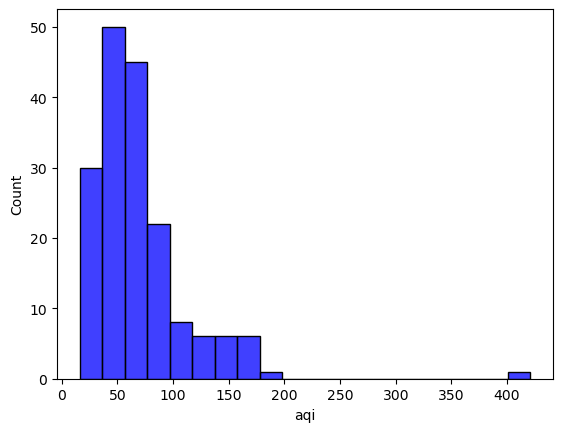

In [ ]:
sns.histplot(air_data['aqi'], bins=20, color='blue')

While South Korea here appear to be an outlier, there is no reason to drop it as a quick google search verifies that it indeed has one of the worst air quality indicators.

## Global Electric Vehicle Data (2010-2023)


The Global Electric Vehicle Dataset is sourced from a combination of data from annual Global EV Outlook publications from 2010 to 2023 by the International Energy Agency. For our research question, we are only focusing on the historical EV sales share data of each country for the provided years, since it outlines the proportion of vehicle sales in each country that are electric vehicles, outlining the proportion of each nation’s EV usage  in the nation’s overall vehicle usage.

The important variables of the original dataset include region (string), category (string), parameter (string), mode (string), powertrain (string), year (integer), unit (string), value (float). Region outlines each observation’s associated region, ‘World’ for global data, and a unique country name for national data. Category indicates if each observation is Historical or Projection data. Parameter indicates what metric the observation is measuring. Powertrain is each observation’s associated powertrain (Cars, Buses, Vans, etc). Year indicates each observation’s year. Value is the numerical value of the measurement of Parameter, and Unit is the unit of each Value.


After downloading the dataset from Kaggle, we read the CSV and parse it to become a DataFrame using pandas.

In [ ]:
all_df = pd.read_csv('data/IEA Global EV Data 2024.csv')
all_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


Afterwards, we clean the data by checking if any rows have null values in any of their columns to see if there are rows we need to drop. Thankfully, the original dataset is already cleaned, so no further cleaning is needed.

In [ ]:
all_df[all_df.isnull().any(axis=1)] #returned an empty dataframe, meaning there are no rows with null values to remove

,region,category,parameter,mode,powertrain,year,unit,value


For our analysis, we only need "Historical" and "EV sales share" data from this dataset. Hence, we query the "category" and "parameter" columns to get a more specific subset of data, dropping the unneeded self-explanatory columns after the query. To make the columns and their data clearer, we rename the colums to be more fitting.

In [ ]:
sales_df = all_df[(all_df['category'] == 'Historical') & (all_df['parameter'].isin(['EV sales share']))]
sales_df = sales_df.drop(columns=['category', 'unit', 'parameter'])
sales_df = sales_df.rename(columns = {'region': 'country', 'value': 'EV sales share'})
sales_df
# ev_df = all_df.pivot_table(index=['country', 'mode', 'powertrain', 'year'],
#                              columns='parameter',
#                              values='value',
#                              aggfunc='first').reset_index()
# ev_df.head(5)

,country,mode,powertrain,year,EV sales share
1,Australia,Cars,EV,2011,0.0065
6,Australia,Cars,EV,2012,0.0300
13,Australia,Cars,EV,2013,0.0340
18,Australia,Cars,EV,2014,0.1600
25,Australia,Cars,EV,2015,0.2000
...,...,...,...,...,...
12165,World,Vans,EV,2022,3.2000
12314,World,Vans,EV,2023,4.4000
12323,World,Buses,EV,2023,3.1000
12366,World,Trucks,EV,2023,0.9100


In [ ]:
stock_df = all_df[(all_df['category'] == 'Historical') & (all_df['parameter'].isin(['EV stock share']))]
stock_df = stock_df.drop(columns=['category', 'unit', 'parameter'])
stock_df = stock_df.rename(columns = {'region': 'country', 'value': 'EV stock share'})
stock_df

,country,mode,powertrain,year,EV stock share
0,Australia,Cars,EV,2011,0.00039
7,Australia,Cars,EV,2012,0.00240
12,Australia,Cars,EV,2013,0.00460
19,Australia,Cars,EV,2014,0.01400
24,Australia,Cars,EV,2015,0.02700
...,...,...,...,...,...
12166,World,Buses,EV,2022,3.30000
12313,World,Buses,EV,2023,3.60000
12365,World,Trucks,EV,2023,0.36000
12375,World,Cars,EV,2023,3.20000


After loading, cleaning, tidying, and wrangling our data, the resulting DataFrame is one with 1330 observations and 5 variables, ready to use for our analysis!

## Renewable energy consumption (% of total final energy consumption) by country

This dataset is from The World Bank. The World Bank is one of the co-custodians for tracking the United Nation's Sustainable Development Goal 7 (SDG7). The other co-custodians include International Renewable Energy Agency, United Nations Statistics Division, the World Bank, and World Health Organization.

This dataset has information on renewable energy consumption as a percentage of total energy consumption of 266 countries at each year from 1960-2022. The percentages are stored across multiple year columns as floats.

First let's take a look at the dataset:

In [ ]:
renewable_energy_cons = pd.read_csv('data/renewable_energy_consumption.csv')
renewable_energy_cons.iloc[0:3]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.700000,7.000000,6.800000,8.600000,8.30000,9.100000,8.8,8.8,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.128338,62.457688,61.891132,62.242631,63.38709,66.123449,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.700000,20.200000,19.500000,18.300000,18.90000,18.200000,20.0,20.0,NaN,NaN


As we can see, it has columns of the renewable energy consumption rate of each country from the years 1960-2022. For example, we can see that in 2015, 6.7% of Aruba's total energy consumption was from renewable energy. We also notice that 'Africa Eastern and Southern' is present here. This is because the World Bank also has aggregate data for regions.

We notice that the data from before the 2000s is mostly NaN. This makes sense as they probably haven't started keeping track of renewable energy at that time. This is fine because our other data mostly contains data from 2010 onwards anyway. So we drop the columns from 1960-2009 and keep the columns from 2010 onwards. We also drop the columns indicator name and indicator code. These are simply descriptors of what the data in the year columns is about. However, since we already know what the values in each year are and they're the same for all rows, we can safely drop this redundant information

In [ ]:
renewable_energy_cons = (renewable_energy_cons
                         .iloc[:,:-2]
                         .set_index('Country Code')
                         .drop(columns=['Indicator Name', 'Indicator Code'])
                        )
idx_1960 = renewable_energy_cons.columns.get_loc("1960")
idx_2010 = renewable_energy_cons.columns.get_loc("2010")
renewable_energy_cons = renewable_energy_cons.drop(columns=renewable_energy_cons.columns[idx_1960:idx_2010]) #dropping years 1960-2009
renewable_energy_cons.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Code,,,,,,,,,,,,,,
ABW,Aruba,5.500000,5.700000,6.900000,6.900000,6.900000,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,8.8,8.8
AFE,Africa Eastern and Southern,63.099837,63.124652,61.718397,61.082685,61.499577,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,NaN,NaN
AFG,Afghanistan,15.200000,12.600000,15.400000,16.900000,19.100000,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,20.0,20.0
AFW,Africa Western and Central,80.939514,79.576913,78.886876,77.137941,76.135802,76.689160,76.283383,76.413081,75.960030,75.328928,76.102819,NaN,NaN
AGO,Angola,53.100000,51.700000,49.000000,46.800000,47.500000,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,52.9,NaN


Included in the zip file downloaded from the world bank was a profile of every country's income group and region according to the world bank. The IncomeGroup and Region column might be useful for more exploratory data analysis later. So we keep it, discard the other columns, and merge this information with our main energy consumption data set.

In [ ]:
countries = pd.read_csv('data/country_info.csv')
countries.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [ ]:
countries = countries[['Country Code', 'Region', 'IncomeGroup']].set_index('Country Code')

In [ ]:
renewable_energy_cons = renewable_energy_cons.merge(countries, left_index=True, right_index=True, how='left').reset_index(drop=True)
renewable_energy_cons.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Region,IncomeGroup
0,Aruba,5.500000,5.700000,6.900000,6.900000,6.900000,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,8.8,8.8,Latin America & Caribbean,High income
1,Africa Eastern and Southern,63.099837,63.124652,61.718397,61.082685,61.499577,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,NaN,NaN,NaN,NaN
2,Afghanistan,15.200000,12.600000,15.400000,16.900000,19.100000,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,20.0,20.0,South Asia,Low income
3,Africa Western and Central,80.939514,79.576913,78.886876,77.137941,76.135802,76.689160,76.283383,76.413081,75.960030,75.328928,76.102819,NaN,NaN,NaN,NaN
4,Angola,53.100000,51.700000,49.000000,46.800000,47.500000,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,52.9,NaN,Sub-Saharan Africa,Lower middle income


## Annual CO₂ Emissions By Counrtry


This dataset is from Our World in Data, a reputable source which compiles CO₂ emissions data from sources like the Global Carbon Project and national statistical agencies. It tracks annual CO₂ emissions for countries and aggregate regions from 1750 to 2023.

Lets take a look at this dataset:

In [ ]:
co2_data = pd.read_csv("data/annual-co2-emissions-per-country.csv")
co2_data

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
29132,Zimbabwe,ZWE,2019,10262950.0
29133,Zimbabwe,ZWE,2020,8494503.0
29134,Zimbabwe,ZWE,2021,10203630.0
29135,Zimbabwe,ZWE,2022,10424940.0


Each observation corresponds to the annual CO₂ emissions (measured in metric tons) reported for a specific country or region in a given year. This allows for analyzing historical and recent trends in emissions across different locations. Lets understand the data a bit more.



In [ ]:
co2_data.shape

(29137, 4)

In [ ]:
co2_data.dtypes

Entity                   object
Code                     object
Year                      int64
Annual CO₂ emissions    float64
dtype: object

The data types seemed to be correct based on columns.

In [ ]:
co2_data.describe()

,Year,Annual CO₂ emissions
count,29137.000000,2.913700e+04
mean,1947.718022,4.156982e+08
std,58.985133,1.945844e+09
min,1750.000000,0.000000e+00
25%,1912.000000,3.737280e+05
50%,1962.000000,4.990392e+06
75%,1994.000000,5.327268e+07
max,2023.000000,3.779157e+10


In [ ]:
co2_data.isnull().sum()

Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64

Looks like the only column with null values is the Code column which is due to the region specific (continent/ income based aggregates) observations. Lets handle that by changing the null values and keep only relevant years i.e. post 2010.

In [ ]:
co2_data = co2_data[co2_data['Year'] > 2010].copy()
co2_data.rename(columns={"Entity": "Country/Region"}, inplace=True)
co2_data.loc[co2_data["Code"].isnull(), "Code"] = "Region/Income Group"
co2_data

,Country/Region,Code,Year,Annual CO₂ emissions
62,Afghanistan,AFG,2011,11838316.0
63,Afghanistan,AFG,2012,10035314.0
64,Afghanistan,AFG,2013,9228517.0
65,Afghanistan,AFG,2014,9086037.0
66,Afghanistan,AFG,2015,9670181.0
...,...,...,...,...
29132,Zimbabwe,ZWE,2019,10262950.0
29133,Zimbabwe,ZWE,2020,8494503.0
29134,Zimbabwe,ZWE,2021,10203630.0
29135,Zimbabwe,ZWE,2022,10424940.0


Finally, lets check if there are any duplicate entries for a country/region in the given year:

In [ ]:
duplicates_check = co2_data.groupby(["Country/Region", "Year"]).size().reset_index(name="count")
duplicates = duplicates_check[duplicates_check["count"] > 1]
print(duplicates)

Empty DataFrame
Columns: [Country/Region, Year, count]
Index: []


No duplicates!

# Results 💯

## Exploratory Data Analysis 🔎

**Note: if you are only interested in the conclusions of our EDA, skip ahead to "EDA Conclusions"**. The EDA ahead is **exploratory** and therefore filled with code, trial and error, and side investigations in order to fully understand our data. Our EDA Conclusion section at the end has more human-readable results

This exploratory data analysis will mainly explore:
- **the relationship between our independent variables.** This is to ensure no multicollinearity
- **the relationship between our dependent variables to see if CO2 emissions is correlated with air quality**
- **the individual relationships of each of our dependent variables with our independent variables.** This is to get an idea of how to feature engineer our linear regression, e.g. what features should be the most important? Are there any non-linear (logarithmic, quadratic, etc.) relationships between our dependent and independent variables?

### Exploring the Relationship Between EV Adoption and Renewable Energy Consumption Rate


It's important we explore the relationship between the independent variables to ensure no multicollinearity. Our independent variable, a country's EV adoption is reflected by either 'EV sales share' or 'EV stock share', a percentage measuring how much the proportion of all vehicles in the country is considered 'EV'. Similarly, a country's renewable energy consumption rate is how much total energy is sourced from renewable sources.

The EDA process to explore the relationship between each of the EV adoption metric and Renewable Energy Consumption Rate is outlined below, where three main steps were done:
1. Melt the renewable energy DataFrame to desired and easier to work with format, dropping unnecessary columns.
2. Merge DataFrames of both independent variables, dropping unnecessary columns.
3. Aggregate data to average 'EV sales share' or 'EV stock share', and average renewable energy consumption rate per year.

In [ ]:
# Melt Renewable Energy DataFrame
renewable_energy_transformed = renewable_energy_cons.melt(id_vars=["Country Name", "Region", "IncomeGroup"], var_name="Year", value_name="Renewable Energy Consumption Rate")
renewable_energy_transformed.dropna(subset=["Renewable Energy Consumption Rate"], inplace=True)
renewable_energy_transformed['Year'] = renewable_energy_transformed['Year'].apply(lambda x: int(x))
renewable_energy_transformed.head(5)

,Country Name,Region,IncomeGroup,Year,Renewable Energy Consumption Rate
0,Aruba,Latin America & Caribbean,High income,2010,5.500000
1,Africa Eastern and Southern,NaN,NaN,2010,63.099837
2,Afghanistan,South Asia,Low income,2010,15.200000
3,Africa Western and Central,NaN,NaN,2010,80.939514
4,Angola,Sub-Saharan Africa,Lower middle income,2010,53.100000


In [ ]:
# Merge Renewable Energy and EV DFs

sales_independent_df = pd.merge(
    left=sales_df,
    right=renewable_energy_transformed,
    how='left',
    left_on=['country', 'year'],
    right_on=['Country Name', 'Year'],
)

# Drop unnecessary columns
sales_independent_df = sales_independent_df.drop(columns=['Year', 'Country Name'])
sales_independent_df.head(5)

,country,mode,powertrain,year,EV sales share,Region,IncomeGroup,Renewable Energy Consumption Rate
0,Australia,Cars,EV,2011,0.0065,East Asia & Pacific,High income,8.3
1,Australia,Cars,EV,2012,0.0300,East Asia & Pacific,High income,8.3
2,Australia,Cars,EV,2013,0.0340,East Asia & Pacific,High income,9.2
3,Australia,Cars,EV,2014,0.1600,East Asia & Pacific,High income,9.3
4,Australia,Cars,EV,2015,0.2000,East Asia & Pacific,High income,9.4


In [ ]:
# Merge Renewable Energy and EV DFs

stock_independent_df = pd.merge(
    left=stock_df,
    right=renewable_energy_transformed,
    how='left',
    left_on=['country', 'year'],
    right_on=['Country Name', 'Year'],
)

stock_independent_df = stock_independent_df.drop(columns=['Year', 'Country Name'])
stock_independent_df.head(5)

,country,mode,powertrain,year,EV stock share,Region,IncomeGroup,Renewable Energy Consumption Rate
0,Australia,Cars,EV,2011,0.00039,East Asia & Pacific,High income,8.3
1,Australia,Cars,EV,2012,0.00240,East Asia & Pacific,High income,8.3
2,Australia,Cars,EV,2013,0.00460,East Asia & Pacific,High income,9.2
3,Australia,Cars,EV,2014,0.01400,East Asia & Pacific,High income,9.3
4,Australia,Cars,EV,2015,0.02700,East Asia & Pacific,High income,9.4


In [ ]:
#Get Global Data
global_sales_independent_df = sales_independent_df[sales_independent_df['country'] == 'World']
# Drop unnecessary columns
global_sales_independent_df = global_sales_independent_df.drop(columns = ['Region', 'IncomeGroup','country', 'powertrain', 'mode'])
# Aggregate data
global_sales_independent_df = global_sales_independent_df.groupby('year').mean().dropna(subset=['Renewable Energy Consumption Rate'])
global_sales_independent_df = global_sales_independent_df.reset_index()
global_sales_independent_df

,year,EV sales share,Renewable Energy Consumption Rate
0,2010,0.020683,16.747709
1,2011,0.040000,16.717627
2,2012,0.097622,16.953448
3,2013,0.152672,17.211648
4,2014,0.260225,17.380109
5,2015,1.020000,17.424129
6,2016,1.487500,17.676750
7,2017,2.117500,17.919192
8,2018,2.195000,18.162225
9,2019,1.992500,18.636542


In [ ]:
global_stock_independent_df = stock_independent_df[stock_independent_df['country'] == 'World']
global_stock_independent_df = global_stock_independent_df.drop(columns = ['Region', 'IncomeGroup','country', 'powertrain', 'mode'])
global_stock_independent_df = global_stock_independent_df.groupby('year').mean().dropna(subset=['Renewable Energy Consumption Rate'])
global_stock_independent_df = global_stock_independent_df.reset_index()
global_stock_independent_df

,year,EV stock share,Renewable Energy Consumption Rate
0,2010,0.014850,16.747709
1,2011,0.020125,16.717627
2,2012,0.027150,16.953448
3,2013,0.037650,17.211648
4,2014,0.071950,17.380109
5,2015,0.206750,17.424129
6,2016,0.366500,17.676750
7,2017,0.527500,17.919192
8,2018,0.697500,18.162225
9,2019,0.852500,18.636542


To compute the correlation between the two variables, the correlation matrix below was created. It showed that there was a strong positive relationship between 'EV sales share' and 'Renewable Energy Consumption Rate'. While correlation does not imply causation, it suggests that as 'EV sales share' globally increase each year, global renewable energy consumption rate also increases.

In [ ]:
(global_sales_independent_df[['EV sales share', 'Renewable Energy Consumption Rate']].corr())

,EV sales share,Renewable Energy Consumption Rate
EV sales share,1.000000,0.880693
Renewable Energy Consumption Rate,0.880693,1.000000


Same process for 'EV stock share'

In [ ]:
(global_stock_independent_df[['EV stock share', 'Renewable Energy Consumption Rate']].corr())

,EV stock share,Renewable Energy Consumption Rate
EV stock share,1.00000,0.95662
Renewable Energy Consumption Rate,0.95662,1.00000


As can be seen from the correlation values, both 'EV sales share' and 'EV stock share' are strongly positively correlated with Renewable Energy Consumption Rate, suggesting a global trend that as a country adopts more EVs, their renewable energy consumption rate also tends to increase.

To visualize this relationship, scatter plots between the two variables can be created.

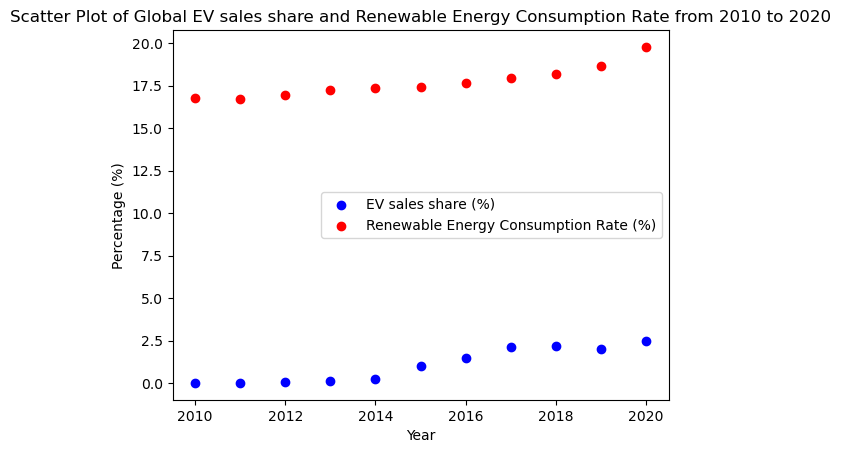

In [ ]:

fig, ax = plt.subplots()


ax.scatter(global_sales_independent_df['year'], global_sales_independent_df['EV sales share'], color='blue', label='EV sales share (%)')  # Scatter plot for the first y-axis variable
ax.scatter(global_sales_independent_df['year'], global_sales_independent_df['Renewable Energy Consumption Rate'], color='red', label='Renewable Energy Consumption Rate (%)')   # Scatter plot for the second y-axis variable


ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Scatter Plot of Global EV sales share and Renewable Energy Consumption Rate from 2010 to 2020')


ax.legend()


plt.show()

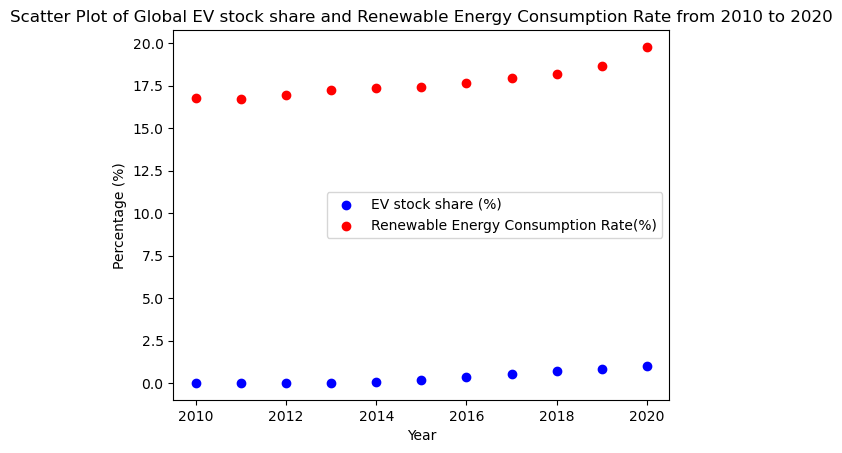

In [ ]:

fig, ax = plt.subplots()


ax.scatter(global_stock_independent_df['year'], global_stock_independent_df['EV stock share'], color='blue', label='EV stock share (%)')  # Scatter plot for the first y-axis variable
ax.scatter(global_stock_independent_df['year'], global_stock_independent_df['Renewable Energy Consumption Rate'], color='red', label='Renewable Energy Consumption Rate(%)')   # Scatter plot for the second y-axis variable

ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Scatter Plot of Global EV stock share and Renewable Energy Consumption Rate from 2010 to 2020')


ax.legend()


plt.show()

The scatter plots above is hard-to-interpret due to the differing scales of both variables. Hence, we can normalize both variables using min-max normalization to better visualize any overlap in changes between our two independent variables.

In [ ]:
global_sales_independent_df['EV_sales_share_normalized'] = (global_sales_independent_df['EV sales share'] - global_sales_independent_df['EV sales share'].min()) / (global_sales_independent_df['EV sales share'].max() - global_sales_independent_df['EV sales share'].min())
global_sales_independent_df['renewable_consumption_normalized'] = (global_sales_independent_df['Renewable Energy Consumption Rate'] - global_sales_independent_df['Renewable Energy Consumption Rate'].min()) / (global_sales_independent_df['Renewable Energy Consumption Rate'].max() - global_sales_independent_df['Renewable Energy Consumption Rate'].min())
global_sales_independent_df

,year,EV sales share,Renewable Energy Consumption Rate,EV_sales_share_normalized,renewable_consumption_normalized
0,2010,0.020683,16.747709,0.000000,0.009851
1,2011,0.040000,16.717627,0.007784,0.000000
2,2012,0.097622,16.953448,0.031001,0.077224
3,2013,0.152672,17.211648,0.053183,0.161777
4,2014,0.260225,17.380109,0.096519,0.216943
5,2015,1.020000,17.424129,0.402656,0.231358
6,2016,1.487500,17.676750,0.591026,0.314084
7,2017,2.117500,17.919192,0.844872,0.393476
8,2018,2.195000,18.162225,0.876099,0.473062
9,2019,1.992500,18.636542,0.794505,0.628387


In [ ]:
global_stock_independent_df['EV_stock_share_normalized'] = (global_stock_independent_df['EV stock share'] - global_stock_independent_df['EV stock share'].min()) / (global_stock_independent_df['EV stock share'].max() - global_stock_independent_df['EV stock share'].min())
global_stock_independent_df['renewable_consumption_normalized'] = (global_stock_independent_df['Renewable Energy Consumption Rate'] - global_stock_independent_df['Renewable Energy Consumption Rate'].min()) / (global_stock_independent_df['Renewable Energy Consumption Rate'].max() - global_stock_independent_df['Renewable Energy Consumption Rate'].min())
global_stock_independent_df

,year,EV stock share,Renewable Energy Consumption Rate,EV_stock_share_normalized,renewable_consumption_normalized
0,2010,0.014850,16.747709,0.000000,0.009851
1,2011,0.020125,16.717627,0.005209,0.000000
2,2012,0.027150,16.953448,0.012146,0.077224
3,2013,0.037650,17.211648,0.022515,0.161777
4,2014,0.071950,17.380109,0.056387,0.216943
5,2015,0.206750,17.424129,0.189503,0.231358
6,2016,0.366500,17.676750,0.347257,0.314084
7,2017,0.527500,17.919192,0.506246,0.393476
8,2018,0.697500,18.162225,0.674122,0.473062
9,2019,0.852500,18.636542,0.827186,0.628387


As a result, better scatter plots between the two variables can be created.

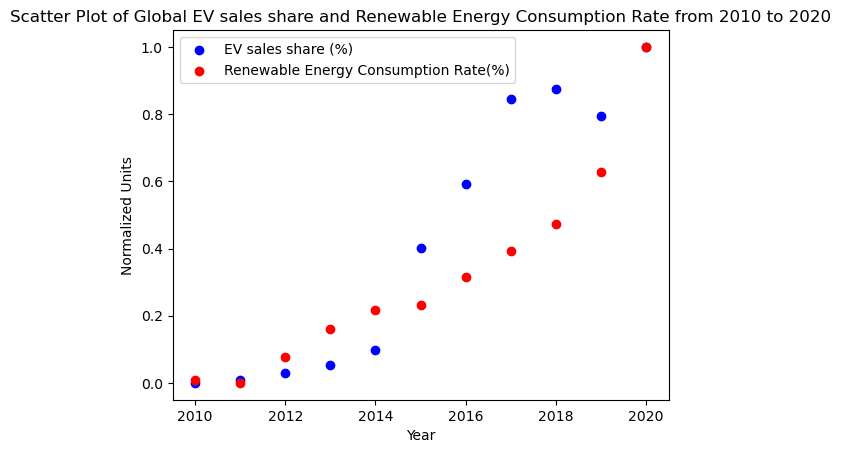

In [ ]:

fig, ax = plt.subplots()

ax.scatter(global_sales_independent_df['year'], global_sales_independent_df['EV_sales_share_normalized'], color='blue', label='EV sales share (%)')  # Scatter plot for the first y-axis variable
ax.scatter(global_sales_independent_df['year'], global_sales_independent_df['renewable_consumption_normalized'], color='red', label='Renewable Energy Consumption Rate(%)')   # Scatter plot for the second y-axis variable
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('Scatter Plot of Global EV sales share and Renewable Energy Consumption Rate from 2010 to 2020')
ax.legend()
plt.show()

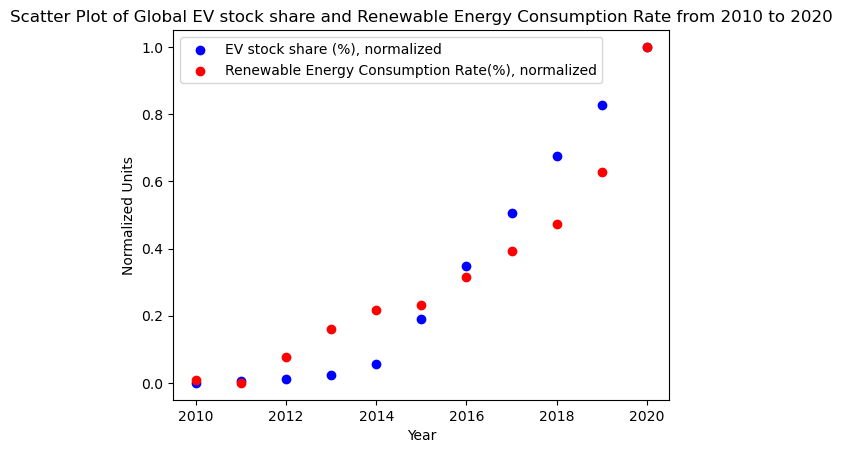

In [ ]:
co2_ev_plot, ax = plt.subplots()


ax.scatter(global_stock_independent_df['year'], global_stock_independent_df['EV_stock_share_normalized'], color='blue', label='EV stock share (%), normalized')  # Scatter plot for the first y-axis variable
ax.scatter(global_stock_independent_df['year'], global_stock_independent_df['renewable_consumption_normalized'], color='red', label='Renewable Energy Consumption Rate(%), normalized')   # Scatter plot for the second y-axis variable


ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('Scatter Plot of Global EV stock share and Renewable Energy Consumption Rate from 2010 to 2020')

ax.legend()
plt.show()

The scatter plots after normalization above show a clearer visualization of the changes between each of 'EV sales share', 'EV stock share' and Renewable Energy Consumption Rate. As each EV adoption metric increases year-by-year, Renewable Energy Consumption Rate increases proportionately at some years, suggesting a correlation between the two variables, which makes multicollinearity possible if we both use these variables in our Linear Regression model later on.

### Relationship Between Dependent Variables


For this task we are dealing with two variables, CO2 emmisions and the Air Quality Index of each country. Since most of our renewable energy consumption data only goes up to 2020, we will be focusing on 2020 data.

In [ ]:
co2_data_recent = co2_data[co2_data['Year'] == 2020]
co2_data_recent.head()

,Country/Region,Code,Year,Annual CO₂ emissions
71,Afghanistan,AFG,2020,1.160593e+07
211,Africa,Region/Income Group,2020,1.355782e+09
385,Africa (GCP),Region/Income Group,2020,1.355771e+09
476,Albania,ALB,2020,4.711145e+06
584,Algeria,DZA,2020,1.681779e+08


In [ ]:
air_data

,country,aqi,co,ozone,no2,pm2.5
0,Afghanistan,87.0,1.0,41.0,0.0,87.0
1,Albania,66.0,1.0,42.0,1.0,66.0
2,Algeria,82.5,1.0,40.0,1.0,72.0
3,Andorra,29.0,1.0,29.0,0.0,22.0
4,Angola,58.0,1.0,21.0,0.0,58.0
...,...,...,...,...,...,...
170,Venezuela (Bolivarian Republic of),60.0,1.0,16.0,3.0,60.0
171,Viet Nam,69.0,2.0,32.0,1.0,69.0
172,Yemen,151.0,1.0,44.0,1.0,151.0
173,Zambia,36.5,1.0,20.0,0.0,36.5


In [ ]:
dependent_df = co2_data_recent.merge(air_data, left_on='Country/Region', right_on='country', how='inner')[['Country/Region','Annual CO₂ emissions','aqi']]
dependent_df

,Country/Region,Annual CO₂ emissions,aqi
0,Afghanistan,11605929.0,87.0
1,Albania,4711145.0,66.0
2,Algeria,168177860.0,82.5
3,Andorra,381056.0,29.0
4,Angola,16532997.0,58.0
...,...,...,...
151,Uzbekistan,109631970.0,119.5
152,Vanuatu,201520.0,30.0
153,Yemen,10883986.0,151.0
154,Zambia,8144346.0,36.5


**Correlation Matrix**

In [ ]:
print(dependent_df[['Annual CO₂ emissions', 'aqi']].corr())

                      Annual CO₂ emissions       aqi
Annual CO₂ emissions              1.000000  0.189568
aqi                               0.189568  1.000000


The correlation matrix shows that a country's CO2 emissions and air quality index are not related. This means that a country's annual CO2 emissions, do not effect their air quality index which was not expected by us. Which is why we will look into the data to verify and explore it through plots.

**Plots**

Initial Plot

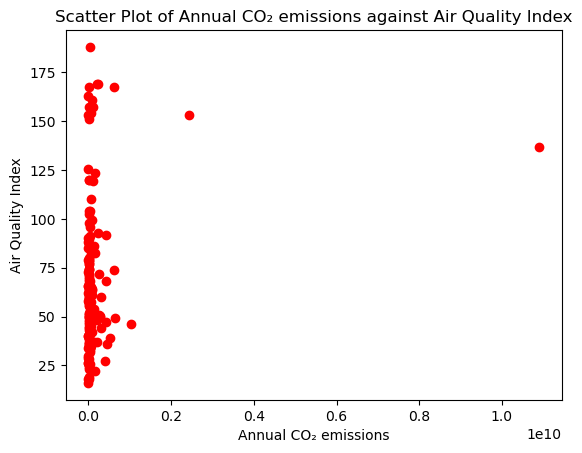

In [ ]:
dependent_fig, dependent_ax = plt.subplots()
dependent_ax.scatter(dependent_df['Annual CO₂ emissions'], dependent_df['aqi'], color='red', label='Annual CO₂ emissions')
dependent_ax.set_xlabel('Annual CO₂ emissions')
dependent_ax.set_ylabel('Air Quality Index')
dependent_ax.set_title('Scatter Plot of Annual CO₂ emissions against Air Quality Index')
plt.show()

We see that since the values of Annual CO2 emissions are too large compared to the Air Quality Index, it is hard for us to do any EDA that accurately compares them. Therefore we will do log transformation to the values of both dependent variables and plot again to see if a there is a difference.

In [ ]:
dependent_df['Annual CO₂ emissions_log'] = dependent_df['Annual CO₂ emissions'].apply(np.log2)
dependent_df['aqi_log'] = dependent_df['aqi'].apply(np.log2)
dependent_df

,Country/Region,Annual CO₂ emissions,aqi,Annual CO₂ emissions_log,aqi_log
0,Afghanistan,11605929.0,87.0,23.468359,6.442943
1,Albania,4711145.0,66.0,22.167646,6.044394
2,Algeria,168177860.0,82.5,27.325413,6.366322
3,Andorra,381056.0,29.0,18.539644,4.857981
4,Angola,16532997.0,58.0,23.978845,5.857981
...,...,...,...,...,...
151,Uzbekistan,109631970.0,119.5,26.708093,6.900867
152,Vanuatu,201520.0,30.0,17.620564,4.906891
153,Yemen,10883986.0,151.0,23.375704,7.238405
154,Zambia,8144346.0,36.5,22.957367,5.189825


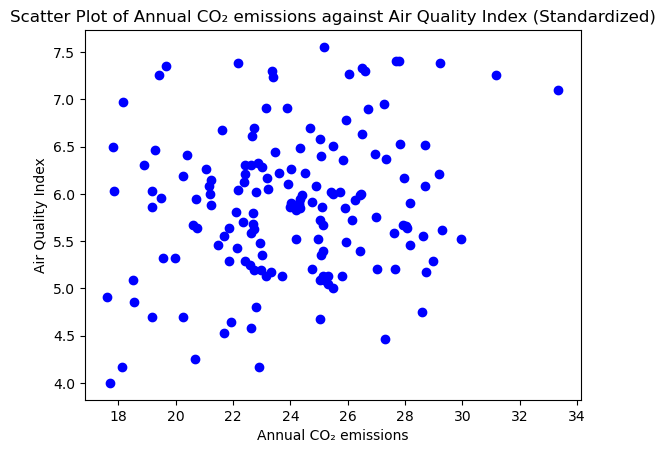

In [ ]:
dependent_fig, dependent_ax = plt.subplots()
dependent_ax.scatter(dependent_df['Annual CO₂ emissions_log'], dependent_df['aqi_log'], color='blue', label='Annual CO₂ emissions')
dependent_ax.set_xlabel('Annual CO₂ emissions')
dependent_ax.set_ylabel('Air Quality Index')
dependent_ax.set_title('Scatter Plot of Annual CO₂ emissions against Air Quality Index (Logarithmic Scale)')
ax.legend()
plt.show()

With this plot, we confirm that there is in fact no correlation between the dependent variables, Annual CO₂ emissions and Air Quality Index.

### Relationship Between Renewable Energy with Air Pollution and CO2 Emissions


For this task, we are dealing with three datasets: renewable energey consumption as an independent variable; co2 emissions and air pollution as dependent variables.

First, lets take a look at those datasets



In [ ]:
renewable_energy_cons.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Region,IncomeGroup
0,Aruba,5.500000,5.700000,6.900000,6.900000,6.900000,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,8.8,8.8,Latin America & Caribbean,High income
1,Africa Eastern and Southern,63.099837,63.124652,61.718397,61.082685,61.499577,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,NaN,NaN,NaN,NaN
2,Afghanistan,15.200000,12.600000,15.400000,16.900000,19.100000,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,20.0,20.0,South Asia,Low income
3,Africa Western and Central,80.939514,79.576913,78.886876,77.137941,76.135802,76.689160,76.283383,76.413081,75.960030,75.328928,76.102819,NaN,NaN,NaN,NaN
4,Angola,53.100000,51.700000,49.000000,46.800000,47.500000,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,52.9,NaN,Sub-Saharan Africa,Lower middle income


In [ ]:
co2_data.reset_index(inplace=True, drop=True)

In [ ]:
co2_data.head()

,Country/Region,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,2011,11838316.0
1,Afghanistan,AFG,2012,10035314.0
2,Afghanistan,AFG,2013,9228517.0
3,Afghanistan,AFG,2014,9086037.0
4,Afghanistan,AFG,2015,9670181.0


In [ ]:
air_data.rename(columns={'country': 'Country Name'}, inplace=True)

In [ ]:
air_data.head()

,Country Name,aqi,co,ozone,no2,pm2.5
0,Afghanistan,87.0,1.0,41.0,0.0,87.0
1,Albania,66.0,1.0,42.0,1.0,66.0
2,Algeria,82.5,1.0,40.0,1.0,72.0
3,Andorra,29.0,1.0,29.0,0.0,22.0
4,Angola,58.0,1.0,21.0,0.0,58.0


Let's first consider the relationship between renewable energey use and co2 emissions, since both include some temporal data.

First, let's transform those dataframes so they have similar formnat.

We also bring both datasets to the same 0-100 scale.

In [ ]:
co2_data_f = co2_data.pivot(index='Country/Region', columns='Year', values='Annual CO₂ emissions').reset_index()
co2_data_f.columns = [["Country Name", '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
scaler = MinMaxScaler(feature_range=(0, 100))
a = co2_data_f[['2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
co2_data_f[['2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023']] = pd.DataFrame(scaler.fit_transform(a.T).T, columns=a.columns)

In [ ]:
co2_data_f.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,100.000000,38.504729,10.987177,6.127589,26.051080,0.000000,26.298698,57.828820,65.443618,92.073940,46.573356,56.325343,72.097003
1,Africa,0.000000,5.192648,11.316145,45.014343,33.893657,53.024945,61.171634,58.215611,100.000000,44.308773,82.937221,78.868989,72.668867
2,Africa (GCP),0.000000,5.192649,11.316253,45.015044,33.894162,53.024120,61.172619,58.216634,100.000000,44.309462,82.938588,78.870465,72.670009
3,Albania,49.916756,15.945428,47.927170,100.000000,5.861424,0.000000,48.335382,19.227870,14.255256,5.788380,36.715043,39.584959,37.457839
4,Algeria,0.000000,17.791953,26.388974,44.040808,58.847670,56.147140,67.401504,80.067070,92.177556,72.453325,91.655790,100.000000,89.194533


Now we would like to discover some trends in the data. First, we will see how trends in the use of renewable energy affect the emission rates trends.

In [ ]:
df1 = renewable_energy_cons[['Country Name', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', 'Region',
       'IncomeGroup']]
print(df1[['2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021']].isna().sum().sum())
df2 = co2_data_f[['Country Name', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021']]
print(df2[['2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021']].isna().sum().sum())

116
0


In [ ]:
def calculate_slope_for_row(row):
  """Calculates the slope of the best fit line for a given row."""
  #years = np.array([int(col) for col in row.index])
  values = row.values
  #print(values)
  x = np.array([i for i in range(len(values))])


  # Handle cases where there are missing values or only one data point
  valid_data_indices = [not pd.isnull(v) for v in values]
  if sum(valid_data_indices) < 2:
      return np.nan  # Not enough data to calculate a slope

  x = x[valid_data_indices]
  values = values[valid_data_indices]

  slope, _, _, _, _ = linregress(x, values)
  return slope

def calculate_slopes_for_dataframe(df):
  """Calculates the slope for each row in the DataFrame."""
  slopes = df.apply(calculate_slope_for_row, axis=1)
  return slopes

Below we are going to compare the slopes of a best fit line between countries for renewable energy use and emission. For example, if across the years we are considering there is an increase in the use of renewable energy, we expect negative correlation with emissions - i.e., positive slope for renewable eneergy woul correlate to negative slope for emissions meaing less emissions

In [ ]:
s = []
for df in [df1, df2]:
  nums = df[['2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021']]
  slopes = calculate_slopes_for_dataframe(nums)
  s.append(slopes)

In [ ]:
df1["re_slope"] = s[0]
df2["co2_slope"] = s[1]

C:\Users\danie\AppData\Local\Temp\ipykernel_3396\3893683322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["re_slope"] = s[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_3396\3893683322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["co2_slope"] = s[1]


In [ ]:
a = df2["Country Name"].to_numpy().reshape(-1)
b = s[1]
data = {'Country Name': a, 'co2_slope': np.array(b)}
df2_1 = pd.DataFrame(data)

In [ ]:
re_co2 = pd.merge(df1[['Country Name', 'Region', 'IncomeGroup',
                       're_slope']], df2_1, how='inner', on="Country Name")

In [ ]:
re_co2.shape

(180, 5)

<Axes: xlabel='re_slope', ylabel='co2_slope'>

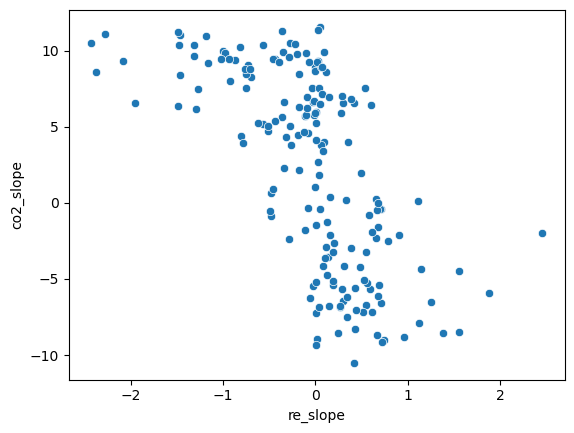

In [ ]:
sns.scatterplot(x='re_slope', y='co2_slope', data=re_co2)

The plot above suggests the when countries are increasing their reusable energy use, they are quite likely to have co2 emission rates dropping. The plot above shows that positive slope for reusable enrgy correlates with negatice slope for emissions.

In [ ]:
cov_matrix = re_co2[['re_slope', 'co2_slope']].cov()

In [ ]:
cov_matrix

,re_slope,co2_slope
re_slope,0.546638,-3.070726
co2_slope,-3.070726,41.781025


Now lets focus on year 2020 data which will be used for further analysis and look at the relationship between emissions and renewable energy use.


In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df22 = df2[["Country Name", "2020"]]
df22.columns = ["Country Name", "co2_2020"]
re_co2_df = pd.merge(df1[["Country Name", "2020"]], df22[["Country Name", "co2_2020"]], on="Country Name")
re_co2_df = re_co2_df.dropna()

X = re_co2_df['2020'].values.reshape(-1, 1)
y = re_co2_df['co2_2020'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_

print("slope and intercept: ", slope, intercept)

correlation_matrix = np.corrcoef(re_co2_df['2020'], re_co2_df['co2_2020'])
correlation_coefficient = correlation_matrix[0, 1]
print("corr coef:", correlation_coefficient)

cov_matrix = np.cov(re_co2_df['2020'], re_co2_df['co2_2020'])
print("covariance matrix")
print(cov_matrix)


slope and intercept:  0.34055575331485255 33.60599941372986
corr coef: 0.29943009646575164
covariance matrix
[[768.75977708 261.805565  ]
 [261.805565   994.43452755]]


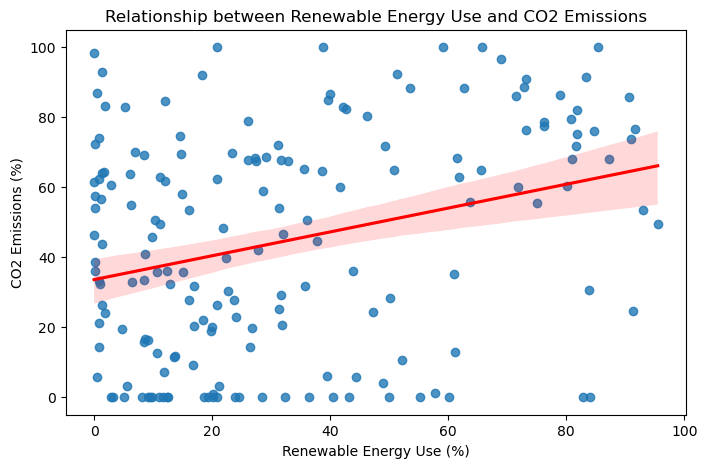

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=re_co2_df['2020'], y=re_co2_df['co2_2020'], line_kws={'color': 'red'})
plt.xlabel('Renewable Energy Use (%)')
plt.ylabel('CO2 Emissions (%)')
plt.title('Relationship between Renewable Energy Use and CO2 Emissions')
plt.show()

Now lets look at the relationship between renewable energy and aqi. There is no temporal data available for aqi, so we will compare the data for renewable enrgy from from 2020 with the aqui values.

In [ ]:

re_co2_df = pd.merge(df1[["Country Name", "2020"]], air_data[["Country Name", "aqi"]], on="Country Name")
re_co2_df = re_co2_df.dropna()

X = re_co2_df['2020'].values.reshape(-1, 1)
y = re_co2_df['aqi'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_

print("slope and intercept: ", slope, intercept)

correlation_matrix = np.corrcoef(re_co2_df['2020'], re_co2_df['aqi'])
correlation_coefficient = correlation_matrix[0, 1]
print("corr coef:", correlation_coefficient)

cov_matrix = np.cov(re_co2_df['2020'], re_co2_df['aqi'])
print("covariance matrix")
print(cov_matrix)

slope and intercept:  -0.2337095198702012 73.85133466710163
corr coef: -0.17917743195069985
covariance matrix
[[ 793.50759117 -185.45027815]
 [-185.45027815 1350.01090508]]


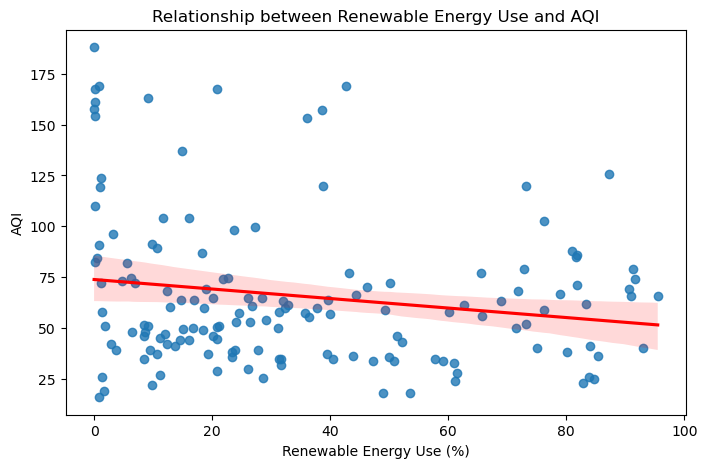

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=re_co2_df['2020'], y=re_co2_df['aqi'], line_kws={'color': 'red'})
plt.xlabel('Renewable Energy Use (%)')
plt.ylabel('AQI')
plt.title('Relationship between Renewable Energy Use and AQI')
plt.show()

### Relationship Between Electric Vehicle Adoption with Air Pollution and CO2 Emissions

In [ ]:
cars_2020 = sales_df[(sales_df['year']==2020) & (sales_df['mode'] == 'Cars')]
ev_aqi = cars_2020.merge(air_data, left_on='country', right_on='Country Name', how='inner')
ev_co2 = cars_2020.merge(co2_data_recent, left_on='country', right_on='Country/Region', how='inner')
display(ev_aqi.head())
display(ev_co2.head())


,country,mode,powertrain,year,EV sales share,Country Name,aqi,co,ozone,no2,pm2.5
0,Australia,Cars,EV,2020,1.10,Australia,27.0,0.0,23.0,1.0,19.0
1,Austria,Cars,EV,2020,9.50,Austria,57.5,1.0,33.5,1.0,57.5
2,Belgium,Cars,EV,2020,11.00,Belgium,42.0,1.0,29.0,3.0,42.0
3,Brazil,Cars,EV,2020,0.16,Brazil,36.0,1.0,12.0,1.0,36.0
4,Canada,Cars,EV,2020,4.20,Canada,39.0,1.0,27.0,1.0,38.0


,country,mode,powertrain,year,EV sales share,Country/Region,Code,Year,Annual CO₂ emissions
0,Australia,Cars,EV,2020,1.10,Australia,AUS,2020,399183900.0
1,Austria,Cars,EV,2020,9.50,Austria,AUT,2020,62175724.0
2,Belgium,Cars,EV,2020,11.00,Belgium,BEL,2020,91228270.0
3,Brazil,Cars,EV,2020,0.16,Brazil,BRA,2020,445208100.0
4,Canada,Cars,EV,2020,4.20,Canada,CAN,2020,526581600.0


**Correlation Matrix**

In [ ]:
print(ev_aqi[['EV sales share', 'aqi']].corr())

                EV sales share       aqi
EV sales share        1.000000 -0.297731
aqi                  -0.297731  1.000000


In [ ]:
print(ev_co2[['EV sales share', 'Annual CO₂ emissions']].corr())

                      EV sales share  Annual CO₂ emissions
EV sales share              1.000000             -0.066332
Annual CO₂ emissions       -0.066332              1.000000


We can see there's not much linear correlation between these variables. Except ev sales share and aqi seem to have a slightly negative linear relationship. That is, when EV sales share is higher, AQI is lower. This is again not expected by us. We'll do some plots to verify there isn't anything weird

**Plots**

[Text(0.5, 1.0, 'Scatter Plot of AQI and EV Sales Share')]

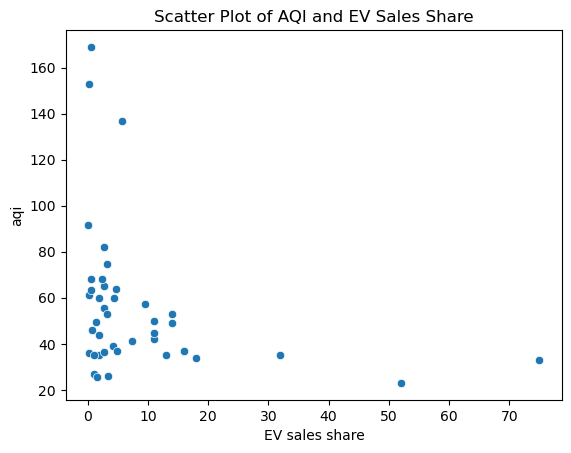

In [ ]:
sns.scatterplot(ev_aqi, x=ev_aqi['EV sales share'],y=(ev_aqi['aqi'])).set(title='Scatter Plot of AQI and EV Sales Share')

Seems like there's some non-linear relationship. Let's do some transforms on the axes.

[Text(0.5, 1.0, 'Scatter Plot of AQI and EV Sales Share'),
 Text(0.5, 0, 'EV sales share, natural log transformed')]

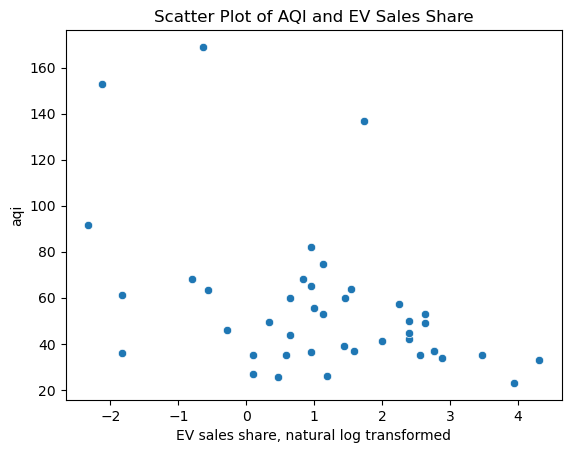

In [ ]:
sns.scatterplot(ev_aqi, x=np.log(ev_aqi['EV sales share']),y=(ev_aqi['aqi'])).set(
           title='Scatter Plot of AQI and EV Sales Share',
           xlabel='EV sales share, natural log transformed')

After trying out some transformations, a log transform on the x-axis seems to the best. So AQI and EV sales share have a logarithmic relationship

Let's do the same for EV sales share and CO2 emissions, and try some transformations to make the plot look better

[Text(0.5, 1.0, 'Scatter Plot of Annual CO2 Emissions and EV Sales Share')]

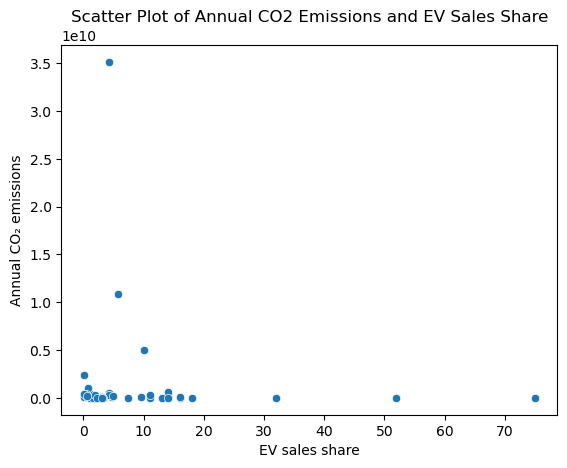

In [ ]:
sns.scatterplot(ev_co2, x=ev_co2['EV sales share'],y=(ev_co2['Annual CO₂ emissions'])).set(
    title=('Scatter Plot of Annual CO2 Emissions and EV Sales Share'))

[Text(0.5, 1.0, 'Scatter Plot of Annual CO2 Emissions and EV Sales Share'),
 Text(0, 0.5, 'Annual CO₂ emissions, natural log transformed')]

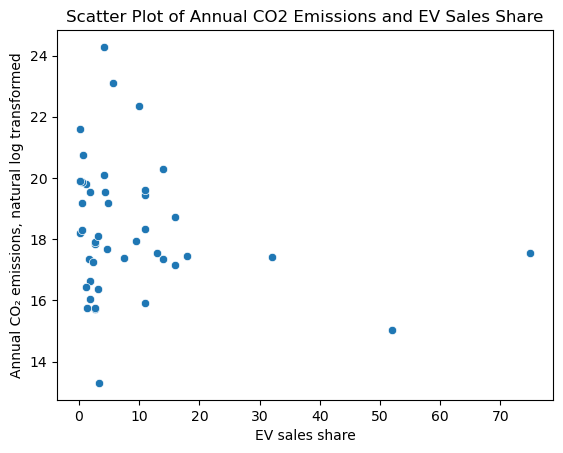

In [ ]:
sns.scatterplot(ev_co2, x=(ev_co2['EV sales share']),y=np.log(ev_co2['Annual CO₂ emissions'])).set(
                         title=('Scatter Plot of Annual CO2 Emissions and EV Sales Share'),
                         ylabel='Annual CO₂ emissions, natural log transformed')

A log transformation on the y-axis seems to be the best. It still seems there is no relationship between EV sales share and CO2 emissions though.

In conclusion, we can see some non-linear relationship between AQI and ev sales share. Good to know! We can train our regression model keeping this in mind later. EV sales share and annual co2 emissions don't have any visible pattern though.

### Relationship Between Income Level with CO2 Emissions

The first step is to merge the datasets to get income group corresponding to country:

In [ ]:
#merging renewable_energy_transformed with co2_data to get income groups
merged_data = co2_data.merge(
    renewable_energy_transformed[['Country Name', 'Year', 'IncomeGroup']],
    left_on=['Country/Region', 'Year'],  
    right_on=['Country Name', 'Year'],  
    how='left'  
)
merged_data=merged_data.drop(columns='Country Name')
merged_data

,Country/Region,Code,Year,Annual CO₂ emissions,IncomeGroup
0,Afghanistan,AFG,2011,11838316.0,Low income
1,Afghanistan,AFG,2012,10035314.0,Low income
2,Afghanistan,AFG,2013,9228517.0,Low income
3,Afghanistan,AFG,2014,9086037.0,Low income
4,Afghanistan,AFG,2015,9670181.0,Low income
...,...,...,...,...,...
3206,Zimbabwe,ZWE,2019,10262950.0,Lower middle income
3207,Zimbabwe,ZWE,2020,8494503.0,Lower middle income
3208,Zimbabwe,ZWE,2021,10203630.0,Lower middle income
3209,Zimbabwe,ZWE,2022,10424940.0,NaN


Handling missing values for aggregagtes by dropping those rows and using forward and backward fill for missing values for specific years:

In [ ]:
# Identifying aggregate entries where all IncomeGroup values are missing-drop them
aggregates_to_drop = merged_data.groupby('Country/Region')['IncomeGroup'].apply(lambda x: x.isna().all())
co2_income = merged_data[~merged_data['Country/Region'].isin(aggregates_to_drop[aggregates_to_drop].index)].copy()
# using forward/backward fill for missinf IncomeGroup values for specific year for same country
co2_income.loc[:, 'IncomeGroup'] = co2_income.groupby('Country/Region')['IncomeGroup'].ffill().bfill()
co2_income

,Country/Region,Code,Year,Annual CO₂ emissions,IncomeGroup
0,Afghanistan,AFG,2011,11838316.0,Low income
1,Afghanistan,AFG,2012,10035314.0,Low income
2,Afghanistan,AFG,2013,9228517.0,Low income
3,Afghanistan,AFG,2014,9086037.0,Low income
4,Afghanistan,AFG,2015,9670181.0,Low income
...,...,...,...,...,...
3206,Zimbabwe,ZWE,2019,10262950.0,Lower middle income
3207,Zimbabwe,ZWE,2020,8494503.0,Lower middle income
3208,Zimbabwe,ZWE,2021,10203630.0,Lower middle income
3209,Zimbabwe,ZWE,2022,10424940.0,Lower middle income


Let's check out the average CO₂ emissions for all years based on income groups:

In [ ]:
#avg co2 emissions by income group for all years
income_groups_total=co2_income.groupby('IncomeGroup')['Annual CO₂ emissions'].mean().reset_index().sort_values(by="Annual CO₂ emissions", ascending=False)
income_groups_total

,IncomeGroup,Annual CO₂ emissions
3,Upper middle income,2.983179e+08
0,High income,1.883437e+08
2,Lower middle income,8.141515e+07
1,Low income,3.880519e+06


We first add a column to represent income level in numeric (ascending) format:

In [ ]:
income_mapping = {
    "Low income": 1,
    "Lower middle income": 2,
    "Upper middle income": 3,
    "High income": 4
}
co2_income = co2_income.copy()
# Applying mapping to create a new numeric column for income level
co2_income.loc[:, "Income Level Numeric"] = co2_income["IncomeGroup"].map(income_mapping)
co2_income.head()

,Country/Region,Code,Year,Annual CO₂ emissions,IncomeGroup,Income Level Numeric
0,Afghanistan,AFG,2011,11838316.0,Low income,1
1,Afghanistan,AFG,2012,10035314.0,Low income,1
2,Afghanistan,AFG,2013,9228517.0,Low income,1
3,Afghanistan,AFG,2014,9086037.0,Low income,1
4,Afghanistan,AFG,2015,9670181.0,Low income,1


**Plots**

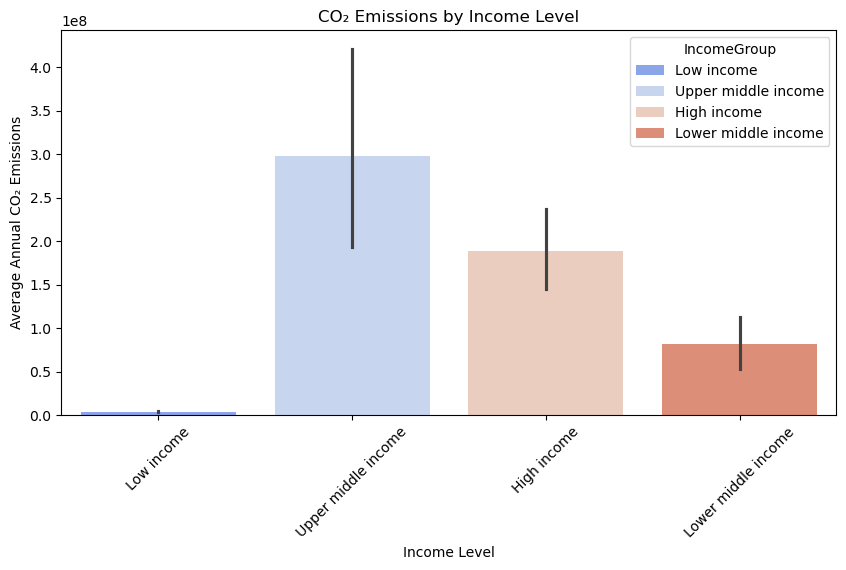

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="IncomeGroup", y="Annual CO₂ emissions", hue="IncomeGroup",
            data=co2_income, palette="coolwarm", legend=True)

plt.xlabel("Income Level")
plt.ylabel("Average Annual CO₂ Emissions")
plt.title("CO₂ Emissions by Income Level")
plt.xticks(rotation=45)
plt.show()


The results indicate that upper-middle-income countries contribute the highest annual CO₂ emissions, followed by high-income countries, while lower-middle-income and low-income countries have significantly lower emissions. This suggests a link between economic development and CO₂ output, likely driven by industrial activity and energy consumption. However, the variance within income groups implies that additional factors influence emissions beyond just income level.

Let us now apply apply a log transformation to normalize the skewed CO₂ emissions data and reduce the impact of extreme values:

In [ ]:
co2_income["Log CO₂ emissions"] = np.log1p(co2_income["Annual CO₂ emissions"]) #log transformation for co2 emissions

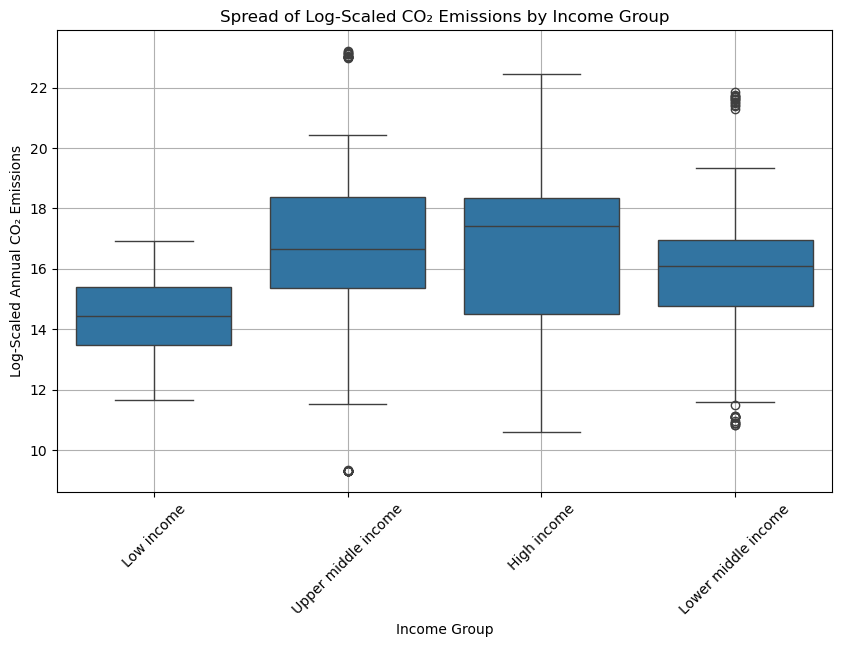

In [ ]:
#boxplot of co2 emissions (log transformed) spread by group
co2_log_group = plt.figure(figsize=(10, 6))
sns.boxplot(data=co2_income, x="IncomeGroup", y="Log CO₂ emissions")
plt.xlabel("Income Group")
plt.ylabel("Log-Scaled Annual CO₂ Emissions")
plt.title("Spread of Log-Scaled CO₂ Emissions by Income Group")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The log-transformed boxplot shows a more balanced distribution of CO₂ emissions across income groups. While upper-middle and high-income countries still have higher emissions, the spread is more comparable across categories.

Now, lets analyze the trend over time by income group:

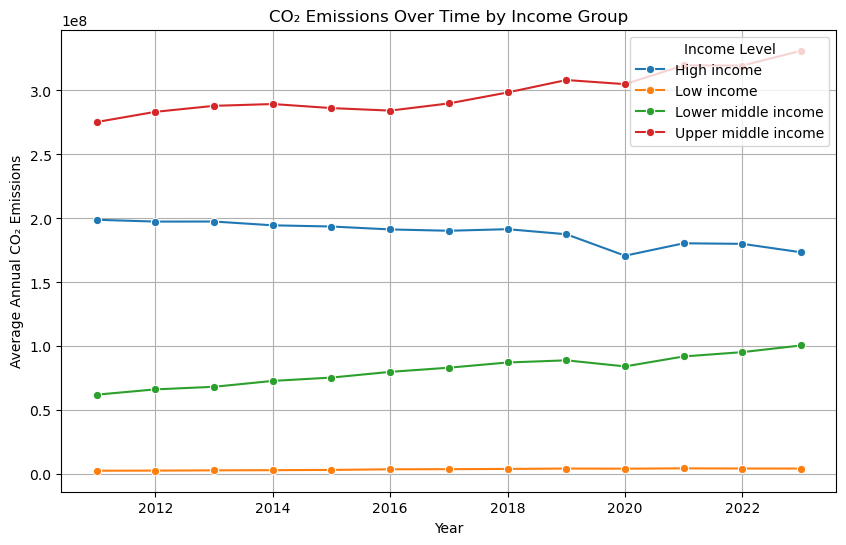

In [ ]:
#co2 emissions trend by income group
trend = co2_income.groupby(["Year", "IncomeGroup"])[["Annual CO₂ emissions"]].mean().reset_index()
co2_trend = plt.figure(figsize=(10, 6))
sns.lineplot(data=trend, x="Year", y="Annual CO₂ emissions", hue="IncomeGroup", marker="o")

plt.xlabel("Year")
plt.ylabel("Average Annual CO₂ Emissions")
plt.title("CO₂ Emissions Over Time by Income Group")
plt.legend(title="Income Level")
plt.grid(True)

plt.show()



Over time, emissions in upper-middle and lower-middle-income countries have steadily increased, whereas high-income countries exhibit slight fluctuations with a recent upward trend. Low-income countries maintain consistently low emissions with minimal change.

**Correlation Matrix**

Now, let's compute the correlation matrices between income level and CO₂ emissions:

In [ ]:
corr_matrix= co2_income[['Income Level Numeric', 'Annual CO₂ emissions']].corr()
corr_matrix

,Income Level Numeric,Annual CO₂ emissions
Income Level Numeric,1.000000,0.072658
Annual CO₂ emissions,0.072658,1.000000


In [ ]:
co2_income["CO2 Squared"] = co2_income["Annual CO₂ emissions"] ** 2
corr_matrix_quad = co2_income[['Income Level Numeric', 'CO2 Squared']].corr()
corr_matrix_quad

,Income Level Numeric,CO2 Squared
Income Level Numeric,1.000000,0.026275
CO2 Squared,0.026275,1.000000


In [ ]:
corr_matrix_exp = co2_income[['Income Level Numeric', 'Log CO₂ emissions']].corr()
corr_matrix_exp

,Income Level Numeric,Log CO₂ emissions
Income Level Numeric,1.000000,0.265689
Log CO₂ emissions,0.265689,1.000000


The correlation matrices show almost no correlation between income level and CO₂ emissions (0.0727) and quadratic transformation shows a similar, even weaker correlation 
(0.0263), suggesting that economic classification alone does not strongly determine emissions. However, applying a log transformation improves correlation (0.2657), indicating a potential nonlinear relationship. This suggests that higher-income countries may have more industrial activity and energy use, but other factors also influence emissions.

## EDA conclusions - Are there correlations between individual variables?

According to our EDA:
1. Only a country's **renewable energy adoption** is negatively correlated with the its CO2 emissions.

2. There is not much correlation between a country's **EV sales share** with its CO2 emissions. However, there is some nonlinear relationship between EV sales share and AQI.



3.   There is some negative correlation between renewable enrgy use and CO2 emissions, meaning increased use of reusable energy correlates with decreased CO2 emissions.


4.   Renewable energy use is weekly correlated with cleaner air




As can be seen from the plot below, no correlation between EV sales share and CO2 emissions. This might make sense because richer countries tend to have higher EV sales share, but that is counteracted by the fact that richer countries are usually more industrialized and emit more CO2.

[Text(0.5, 1.0, 'Scatter Plot of Annual CO2 Emissions and EV Sales Share'),
 Text(0, 0.5, 'Annual CO₂ emissions, natural log transformed')]

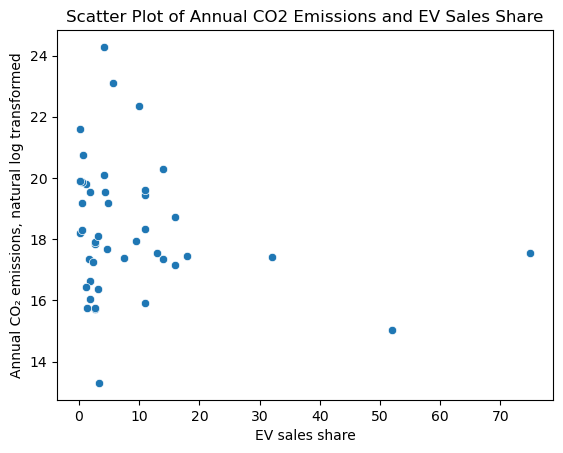

In [ ]:
sns.scatterplot(ev_co2, x=(ev_co2['EV sales share']),y=np.log(ev_co2['Annual CO₂ emissions'])).set(
                         title=('Scatter Plot of Annual CO2 Emissions and EV Sales Share'),
                         ylabel='Annual CO₂ emissions, natural log transformed')

As can be seen from the plot below, there appears to be some logarithmic negative relationship between AQI and EV sales share. Higher EV sales share seems to mean even smaller AQI. This might also make sense because less industralized countries tend to have less EVs but also cleaner air because they don't have much industry

[Text(0.5, 1.0, 'Scatter Plot of AQI and EV Sales Share'),
 Text(0.5, 0, 'EV sales share, natural log transformed')]

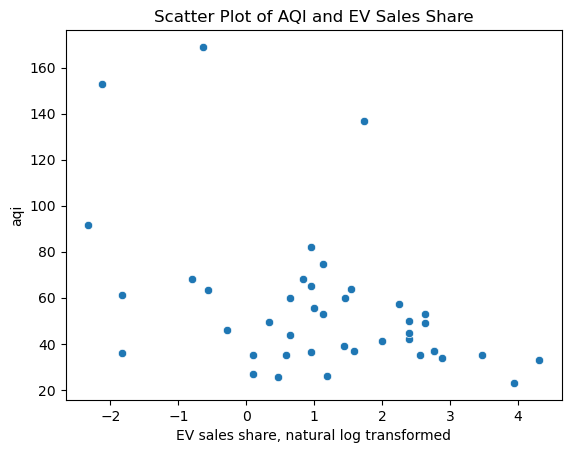

In [ ]:
sns.scatterplot(ev_aqi, x=np.log(ev_aqi['EV sales share']),y=(ev_aqi['aqi'])).set(
           title='Scatter Plot of AQI and EV Sales Share',
           xlabel='EV sales share, natural log transformed')

3. Renewable energy adoption and EV sales share are highly correlated from year to year, as shown from the graph below

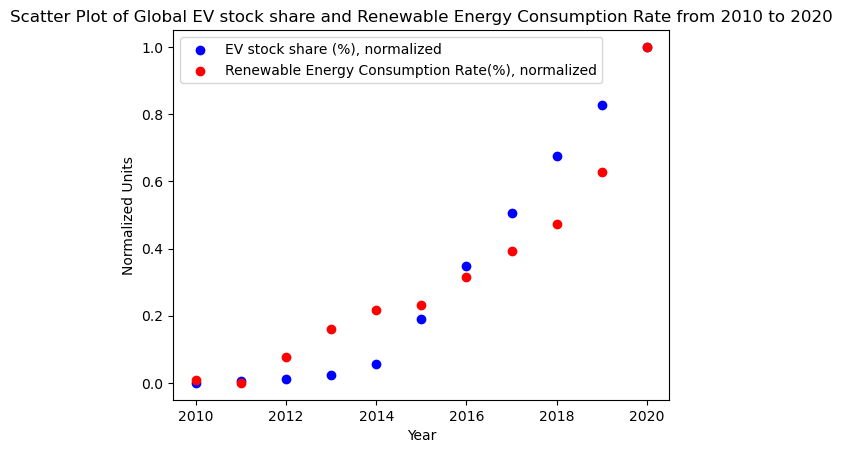

In [ ]:
co2_ev_plot

4. A country's income level has little correlation with CO₂ emissions, but a log transformation suggests a weak nonlinear relationship where higher-income countries may emit more CO₂.


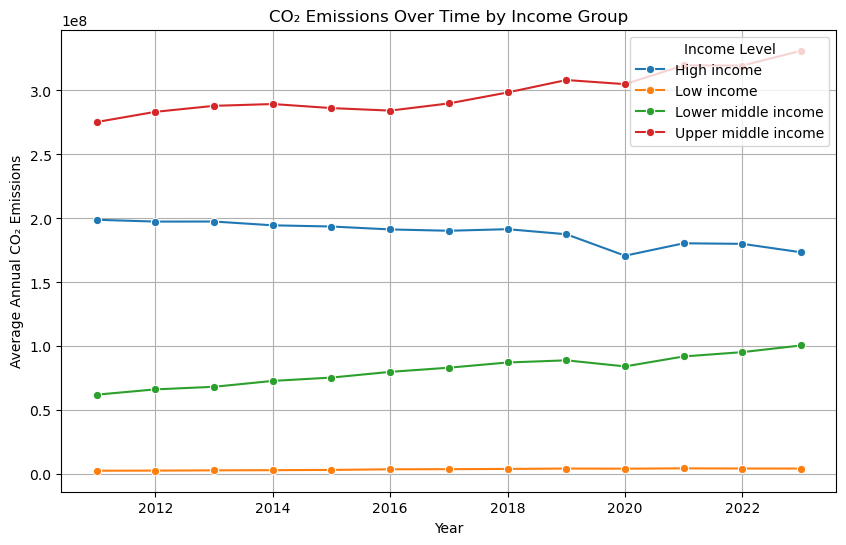

In [ ]:
co2_trend

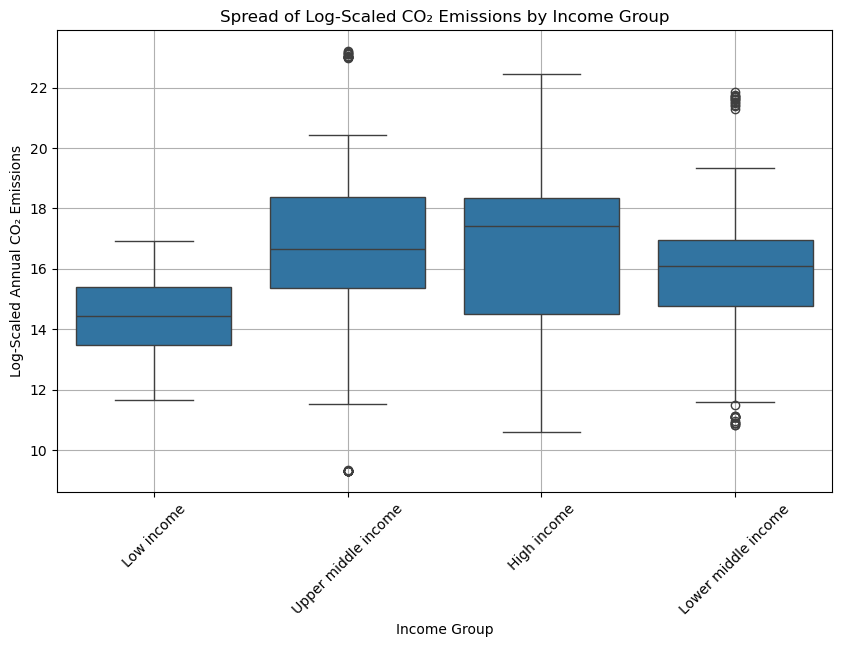

In [ ]:
co2_log_group

In [ ]:
corr_matrix

,Income Level Numeric,Annual CO₂ emissions
Income Level Numeric,1.000000,0.072658
Annual CO₂ emissions,0.072658,1.000000


In [ ]:
corr_matrix_exp

,Income Level Numeric,Log CO₂ emissions
Income Level Numeric,1.000000,0.265689
Log CO₂ emissions,0.265689,1.000000


The correlation matrix (0.0727) shows little correlation between income level and CO₂ emissions. However, the log-transformed boxplot and log correlation (0.2657) suggest a weak nonlinear relationship, where higher-income countries may emit more CO₂. The trend plot further supports this, showing higher emissions in wealthier nations but no strong linear pattern.

5. There is no linear relationship between AQI and CO2 emissions

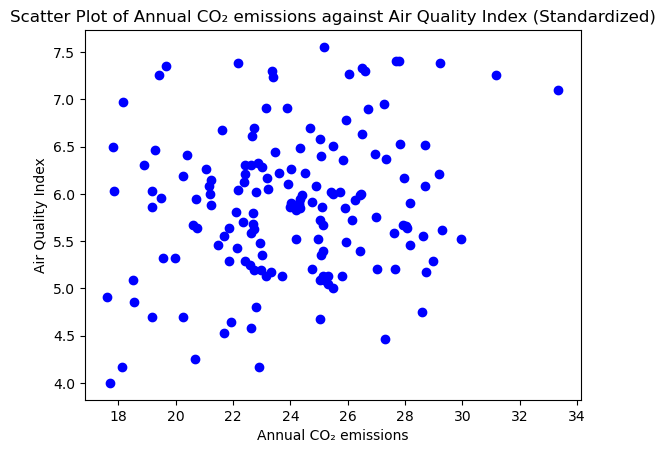

In [ ]:
dependent_fig

In [ ]:
print(dependent_df[['Annual CO₂ emissions', 'aqi']].corr())

                      Annual CO₂ emissions       aqi
Annual CO₂ emissions              1.000000  0.189568
aqi                               0.189568  1.000000


With the plot and correlation matrix, we can clearly see that there is in fact no correlation between the dependent variables, Annual CO₂ emissions and Air Quality Index.

## Linear Regression and correlation coefficient
What is the correlation between these variables if we built a linear regression model?

We decide to do an inner merge for all the datasets to avoid missing values that could mess with our model. We decided not to use EV sales share on our linear model based on a few EDA findings:
- 'EV sales share' has no correlation with CO2 emissions, and only a slightly negative logarithmic relationship with AQI
- It was found that the dataset on EV sales doesn't have many countries that overlap with the recorded countries of our other datasets. Hence, if an inner merge was done to include the EV sales variable, the DataFrame would only have 29 instances, and building a model would not provide any meaningful insights.

With that in mind, we merge our dataset and build our model.

In [ ]:
renewable_energy_recent = renewable_energy_transformed[renewable_energy_transformed['Year'] == 2020]
model_df = co2_data_recent.merge(
    renewable_energy_recent,
    left_on='Country/Region',
    right_on='Country Name',
    how='inner').drop(columns=['Year_x', 'Year_y', 'Country/Region']).merge(
    air_data,
    on='Country Name',
    ).drop(columns=['co','ozone','no2','pm2.5', 'Code', 'Region']).set_index('Country Name').rename(
    columns={'Annual CO₂ emissions': 'co2'}
    )
#model_df['IncomeGroup']=model_df['IncomeGroup'].map(income_mapping)
print(model_df.shape[0])
model_df.head()

147


,co2,IncomeGroup,Renewable Energy Consumption Rate,aqi
Country Name,,,,
Afghanistan,11605929.0,Low income,18.2,87.0
Albania,4711145.0,Upper middle income,44.4,66.0
Algeria,168177860.0,Upper middle income,0.1,82.5
Andorra,381056.0,High income,20.9,29.0
Angola,16532997.0,Lower middle income,60.1,58.0


[Text(0.5, 1.0, 'Distribution of CO2 emissions')]

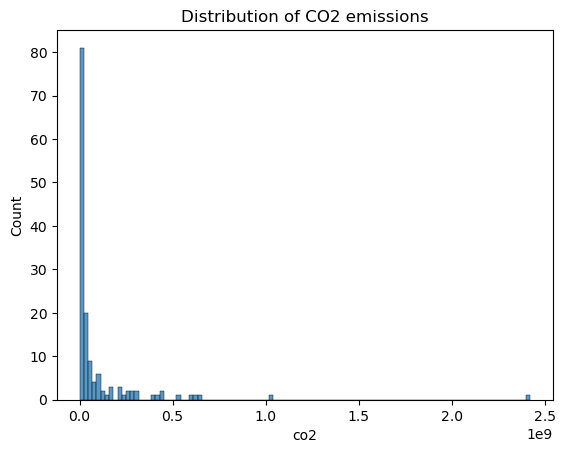

In [ ]:
sns.histplot(model_df[model_df['co2']<model_df['co2'].max()]['co2']).set(title="Distribution of CO2 emissions")

As can be seen from the histogram of CO₂ emissions (our target variable) and multiple times when it is plotted in our EDA, the distribution of our target variable is right-skewed, as some countries or regions emit significantly more than others. Applying a log transformation to the target variable makes the distribution more normal-like, improving model performance by stabilizing variance and reducing the impact of extreme values, allowing more meaningful analysis. Furthermore, we found that our renewable energy consumption rate has a log relationship with CO2 emissions.

After merging our datasets, 147 instances, each representing a country, its income group classification, CO2 emissions, renewable energ energy consumption rate, and air quality index (aqi).

Now, we want to build a linear regression model to answer our question: Does a country’s use of renewable energy, income level, and electric vehicle adoption affect its air quality and CO2 emissions? **Note** that a train-test-split is not done because we are not trying to build an "accurate" prediction model. Instead, we want to extract the correlation between variables in our dataset from the prediction model. That is, we are building a linear regression model not for a prediction problem, rather for descriptive statistics purposes.

In [ ]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

We start with CO2 emissions:

In [ ]:
features = ['Renewable Energy Consumption Rate', 'IncomeGroup']

scaler = StandardScaler()
model_df['co2_normalized'] = scaler.fit_transform(model_df[['co2']])
model_df['co2_log'] = np.log(model_df['co2'])

income_group_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False)),
])

energy_cons_pipeline = Pipeline([
    #('Renewable energy standardized', FunctionTransformer()),
    ('scaler', StandardScaler())
])
with_one_hot = ColumnTransformer(
    transformers=[
        ('Renewable energy', energy_cons_pipeline, ['Renewable Energy Consumption Rate']),
        ('OneHot', income_group_pipeline, ['IncomeGroup']),
    ],
    force_int_remainder_cols=False)

pl_co2 = Pipeline(steps=[
    ('preprocessor', with_one_hot),
    ('model', LinearRegression())
])

target = 'co2_log'
pl_co2.fit(model_df[features], model_df[target])
r2 = pl_co2.score(model_df[features], model_df[target])
print("R^2: ", r2)

R^2:  0.23581804514610316


Our R^2 suggests that only a low proportion of the variation in CO2 emissions (after log transform) is predictable from the renewable energy consumption and income group of a country. That is, CO2 can partially be affected by renewable energy consumption and income group, but there are likely other factors that affect it more.

Now let's do the same for AQI

In [ ]:
pl_aqi = Pipeline(steps=[
    ('preprocessor', with_one_hot),
    ('model', LinearRegression())
])
target = 'aqi'
pl_aqi.fit(model_df[features], model_df[target])
r2 = pl_aqi.score(model_df[features], model_df[target])
print("R^2: ", r2)

R^2:  0.11640614690259443


Our R^2 suggests that only a low proportion of the variation in AQI is predictable from the renewable energy consumption and income group of a country. That is, AQI can partially be affected by renewable energy consumption and income group, but there are likely other factors that affect it more.

We can interpret our results as meaning **a country’s use of renewable energy and income level has a small effect on its air quality and CO2 emissions**

## Ethics & Privacy

### **Ethics & Privacy**  

- **Are there any biases/privacy/terms of use issues with the data you proposed?**  

  Since the data will be gathered from multiple different sources, which will also be gathered from international databases, it is important that we review and comply with each source's terms of use.  

- **Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis?**  

  The potential biases in our datasets could come from geographical bias, temporal bias and, human error. One huge concern we have is geographical bias, which could come from the fact that datasets are more likely to come from countries that are more developed and have the infrastructure present to support these studies, whereas less developed countries might not have data reporting their EV sales, air quality, etc.

  Temporal bias comes from the different time periods the different datasets were collected, since different period of times will have different emissions levels.

  Human error is also a big caution for us to note as measurements of air quality or emissions could always have errors due to human inconsistencies..  
  

- **How will you set out to detect these specific biases before, during, and after/when communicating your analysis?**  

  We will make sure to detect and mitigate biases by clearly communicating with each other upon choosing a dataset, we will clearly state out its uncertainties and limitations then decide whether or not to use the dataset. We will also be aware of less credible sources and avoid any sources would have a reason to be bias. We will also do comparative analysis by cross referencing datasets with other different sources if possible to validate the accuracy and consistency of the data that we have found.

- **Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?**  

  We will be careful in ensuring that our data will not be over-generalized and unfairly disadvantage a certain community or region, we will also consider both the societal and economical situations of the country that our dataset is coming from due to the differences in a country's industrialization stage.

- **How will you handle issues you identified?**  

  We will handle the issues by communicating with each other, performing statistical checks to identify any anomalies in the data or outliers that could result in errors in our analysis, perform comparative analysis by cross refercing sources with other sources to validate its claims and data, we will also clearly document any doubts we have such as the assumptions we make or limitations our datasets' possess. Then we will also always perform reviews through every step we make regarding data selection and analysis to ensure that our study adheres to ethical and anti-bias practices.  


# Discussion and Conclusion
The goal of our project was to find out whether a country’s renewable energy consumption, income level, and electric vehicle adoption affected its air quality and CO2 emissions. We also wanted to find out the correlation between these independent and dependent variables by using a Linear Regression model. Here are the main insights from our analysis:

Our analysis revealed that the highest CO2 emitting countries are usually categorized primarily as upper middle-income nations. In comparison, low-income countries (developing) emit the lowest amounts of CO2, while lower-middle and high income (developed) countries both emit medium levels of CO2. This outcome can be attributed to several socio-economic and industrial factors. Upper middle-income countries are often 'developing' countries close to being 'developed. Hence, they undergo rapid industrialization and urbanization, which increases energy demands substantially, typically met through large-scale fossil fuel consumption. These nations possess the financial resources to invest heavily in industries such as manufacturing, which are significant contributors to CO2 emissions. However, they may not yet have the capability or inclination to switch to cleaner energy sources as aggressively as high-income countries, which often have more stricter environmental regulations and greater technological capabilities. This highlights profound equity implications. As these countries strive to enhance their economic status, they may inadvertently exacerbate environmental degradation, affecting the global community and their populations with heightened pollution levels. This insight underscored the need for balancing economic growth with sustainable practices, ensuring balance between environmental responsibilities and pursuing income growth.

In our investigation of the correlation between electric vehicle (EV) adoption (reflected through a country's 'EV sales share' and 'EV stock share') and environmental outcomes, the data indicates a lack of significant correlation between EV adoption and CO2 emissions. This finding suggests that simply increasing the number of electric vehicles on the road does not automatically translate to a proportional decrease in CO2 emissions. This may be due to many confounding factors in both EV adoption and CO2 emissions. In many regions, EV adoption includes hybrid vehicles, which still relies heavily on fossil fuels. Interestingly, EV adoption shows a slight negative correlation with the Air Quality Index (AQI). This implies the logical notion that increased EV usage could contribute to better local air quality, potentially due to reduced emissions from traditional gas-powered vehicles. It highlights the role of EVs in improving urban air quality, though their impact on broader CO2 emissions remains limited by factors such as energy sourcing and energy efficiency in transportation that can still be improved.

Additionally, it was interesting to see that our data strongly indicated that electric vehicle (EV) adoption is highly correlated with the increase in renewable energy consumption year-by-year globally. Based on global aggregated data, 'EV sales share' and 'EV stock share' had a 0.88 and 0.96 correlation with renewable energy consumption rate from 2010 to 2022. This relationship suggests that as more countries and consumers transition to renewable energy sources like wind, solar, and hydroelectric power, there is a concurrent rise in the adoption of EVs. This correlation may be driven by the growing awareness and governmental policies aimed at reducing carbon footprints, where incentives are often provided for both renewable energy initiatives and electric vehicle purchases. Additionally, the infrastructural developments supporting renewable energy capacities are likely facilitating this shift. By creating a symbiotic relationship between renewable energy production and consumption, countries can foster a more sustainable environment where electric vehicles are a viable and environmentally friendly option.

Finally, our Linear Regression model revealed that the effects of a country’s use of renewable energy and income level on its air quality and CO2 emissions were only modest. While there is some influence of these factors on environmental quality, it is not as significant as people might expect. The relatively low correlation coefficients (0.12 for air quality index and 0.25 for CO2 emissions) could indicate that other unaccounted factors, such as industrial policies, technological advancements, or international trade dynamics, might play more substantial roles than the factors that we considered. Moreover, it implies that simply increasing income levels or renewable energy usage without the proper policies and technological integration may not be enough to achieve concrete improvements in air quality and CO2 emission reductions.

However, we recognize that our analysis was limited by our datasets. While both EV adoption, Renewable Energy Consumption, and CO2 emissions had year-by-year data for each country, AQI data was only for the most recent year (2020). Hence, an inner merge to compare these 4 variables could only be done on a country-to-country basis, instead of a year-to-year basis for each country. Additionally, the list of unique countries that each list had was also different. Some, such as the EV dataset, listed little unique countries in comparison to the other datasets, so there wasn't many overlaps with the other datasets. As a result, an inner merge to build our model would produce too little instances, causing us to not use it in our model considering the weak correlation. This highlights the importance of finding the 'right' data. If we did this project again next time, we would focus on finding datasets where the columns that we wanted to merge on had overlaps, ensuring glanular data and better analysis.

In conclusion, our analysis successfully answered our research question on the impact of a country’s renewable energy consumption, income level, and electric vehicle (EV) adoption on its air quality and CO2 emissions. Contrary to our initial hypothesis, we found that while EV adoption does not significantly correlate with reductions in CO2 emissions, it does exhibit a slight negative correlation with the Air Quality Index (AQI), supporting our expectation of a positive impact on air quality in urban areas. This suggests that EVs can indeed contribute to cleaner urban air environments, though their effect on broader emissions is limited. Additionally, our hypothesis concerning the correlation between renewable energy adoption and improved air quality was only partially supported; the correlation was present but weak, indicating that other confounding factors exist behind determining air quality. On the other hand, high income level countries (most likely developed countries) did have better air quality or lower CO2 emissions, reinforcing the assumption that wealthier nations inherently possess better environmental quality through clean air policies and technology adoption. However, it was interesting to see that upper-middle income countries emitted the highest amount of CO2, likely a 'developing' country making a push to be 'developed'. Overall, these findings suggest a complex interplay of factors influencing environmental outcomes, highlighting the need for comprehensive approaches that include policy, technology, and behavioral changes to effectively address air quality and emissions challenges.

## Team Contributions
- Everyone together:
  - Proofreading and editing
  - EDA
  - Gathering and cleaning data

- Clayton Tan
  - EDA on the relationship between dependent variables
  - Linear Regression Model
  - EDA Conclusion
  - Video
- Daniel Budidharma
  - Organized most meetings and how to to split up the work
  - Linear regression model
  - Wrote discussion and conclusion, as well as abstract
- Sergei Sotkinov
  - Found some of the datasets
  - EDA on renewable energy, air and emissions
  - Video
- Varick Janiro Hasim
  - Came up with the initial idea of our project's topic
  - EDA on relationship between independent variables
  - Wrote discussion and conclusion
- Viveka Dhanda
  - data gathering, cleaninng and idea to explore income groups
  - EDA for co2 and income
  - EDA conclusion
